# **📊 COVID-19 Global Data Tracker**
## Comprehensive Data Analysis and Visualization Project

### 🎯 Project Overview
This notebook analyzes global COVID-19 trends including cases, deaths, recoveries, and vaccinations across countries and time periods. We'll clean real-world data, perform exploratory analysis, and create compelling visualizations to uncover insights.
#### Key Objectives:

* *Import and clean COVID-19 global data*
* *Analyze time trends (cases, deaths, vaccinations)*
* *Compare metrics across countries/regions*
* *Visualize trends with charts and maps*
* *Communicate findings with narrative insights*



### 1️⃣ Data Collection & Setup
#### Import Required Libraries

In [88]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Date handling
from datetime import datetime, timedelta

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Warning suppression
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure plotting
%matplotlib inline

#### Data Source Information
**Primary Dataset:** Our World in Data COVID-19 Dataset

[Dataset link](https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv)
* **Update Frequency**: Daily
* **Coverage**: Global, country-level data

In [90]:
# Data loading
DATA_URL = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

print("📥 Loading COVID-19 dataset...")
try:
    df = pd.read_csv(DATA_URL)
    print(f"✅ Dataset loaded successfully!")
    print(f"📊 Shape: {df.shape[0]} rows × {df.shape[1]} columns")
except Exception as e:
    print(f"❌ Error loading data: {e}")
    print("📝 Alternative: Download owid-covid-data.csv manually")

📥 Loading COVID-19 dataset...
✅ Dataset loaded successfully!
📊 Shape: 429435 rows × 67 columns


### **2️⃣ Data Loading & Exploration**
#### Initial Dataset Exploration

In [100]:
# Basic dataset information
print("🔍 DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Countries/regions: {df['location'].nunique()}")

# Display first few rows
print("\n📋 FIRST 5 ROWS:")
print(df.head())

🔍 DATASET OVERVIEW
Dataset shape: (429435, 67)
Date range: 2020-01-01 to 2024-08-14
Countries/regions: 255

📋 FIRST 5 ROWS:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0     

**Column Analysis**

In [102]:
# Display all columns
print("📊 DATASET COLUMNS:")
print("=" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nTotal columns: {len(df.columns)}")

📊 DATASET COLUMNS:
 1. iso_code
 2. continent
 3. location
 4. date
 5. total_cases
 6. new_cases
 7. new_cases_smoothed
 8. total_deaths
 9. new_deaths
10. new_deaths_smoothed
11. total_cases_per_million
12. new_cases_per_million
13. new_cases_smoothed_per_million
14. total_deaths_per_million
15. new_deaths_per_million
16. new_deaths_smoothed_per_million
17. reproduction_rate
18. icu_patients
19. icu_patients_per_million
20. hosp_patients
21. hosp_patients_per_million
22. weekly_icu_admissions
23. weekly_icu_admissions_per_million
24. weekly_hosp_admissions
25. weekly_hosp_admissions_per_million
26. total_tests
27. new_tests
28. total_tests_per_thousand
29. new_tests_per_thousand
30. new_tests_smoothed
31. new_tests_smoothed_per_thousand
32. positive_rate
33. tests_per_case
34. tests_units
35. total_vaccinations
36. people_vaccinated
37. people_fully_vaccinated
38. total_boosters
39. new_vaccinations
40. new_vaccinations_smoothed
41. total_vaccinations_per_hundred
42. people_vaccinate

**Key columns for analysis**

In [105]:
# Define key columns for our analysis
KEY_COLUMNS = [
    'date', 'location', 'iso_code',
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_tests', 'total_vaccinations', 'people_vaccinated',
    'people_fully_vaccinated', 'population'
]

# Check availability of key columns
print("🎯 KEY COLUMNS AVAILABILITY:")
print("=" * 40)
for col in KEY_COLUMNS:
    available = "✅" if col in df.columns else "❌"
    print(f"{available} {col}")

🎯 KEY COLUMNS AVAILABILITY:
✅ date
✅ location
✅ iso_code
✅ total_cases
✅ new_cases
✅ total_deaths
✅ new_deaths
✅ total_tests
✅ total_vaccinations
✅ people_vaccinated
✅ people_fully_vaccinated
✅ population


**Missing values analysis**

🔍 MISSING DATA ANALYSIS:
                         Missing Count  Missing %
people_fully_vaccinated         351374      81.82
total_tests                     350048      81.51
people_vaccinated               348303      81.11
total_vaccinations              344018      80.11
new_cases                        19276       4.49
new_deaths                       18827       4.38
total_deaths                     17631       4.11
total_cases                      17631       4.11


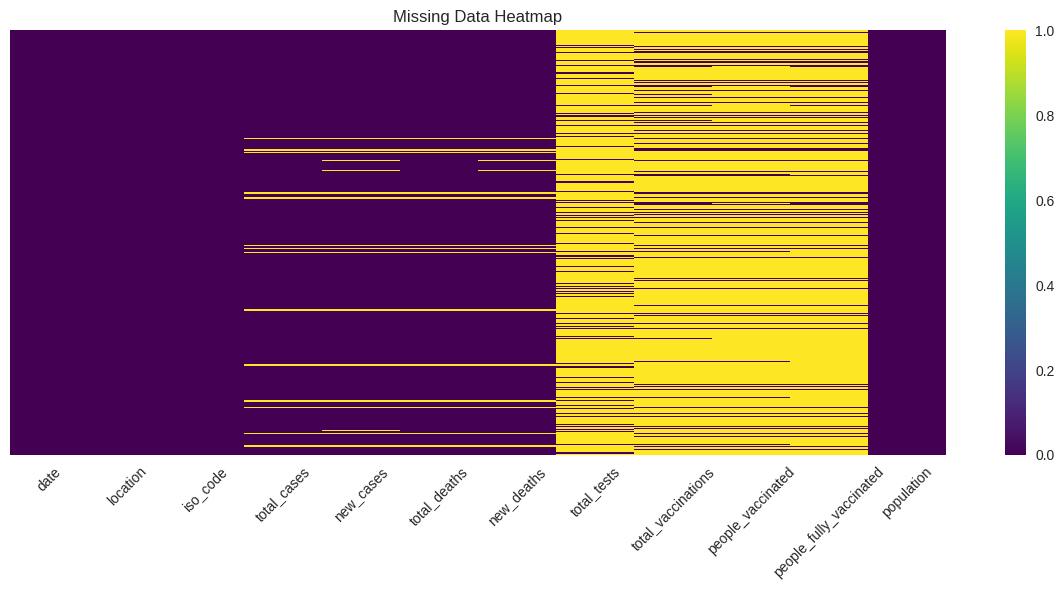

In [108]:
# Analyze missing data
print("🔍 MISSING DATA ANALYSIS:")
print("=" * 40)

missing_data = df[KEY_COLUMNS].isnull().sum().sort_values(ascending=False)
missing_pct = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing %': missing_pct.round(2)
})

print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df[KEY_COLUMNS].isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3️⃣ Data Cleaning
#### Date Processing

In [111]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Add derived date columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear

print("✅ Date processing completed")
print(f"📅 Date range: {df['date'].min()} to {df['date'].max()}")

✅ Date processing completed
📅 Date range: 2020-01-01 00:00:00 to 2024-08-14 00:00:00


#### Country Selection and Filtering

In [114]:
# Define countries of interest for detailed analysis
FOCUS_COUNTRIES = ['Kenya', 'United States', 'India', 'United Kingdom', 
                   'Germany', 'Brazil', 'South Africa', 'China']

# Filter for focus countries
df_focus = df[df['location'].isin(FOCUS_COUNTRIES)].copy()

print("🌍 FOCUS COUNTRIES ANALYSIS:")
print("=" * 40)
for country in FOCUS_COUNTRIES:
    count = len(df_focus[df_focus['location'] == country])
    print(f"{country}: {count} records")

# Remove rows with critical missing data
print(f"\n📊 Before cleaning: {len(df_focus)} rows")
df_focus = df_focus.dropna(subset=['date', 'location'])
print(f"📊 After cleaning: {len(df_focus)} rows")

🌍 FOCUS COUNTRIES ANALYSIS:
Kenya: 1674 records
United States: 1674 records
India: 1682 records
United Kingdom: 1674 records
Germany: 1674 records
Brazil: 1674 records
South Africa: 1674 records
China: 1674 records

📊 Before cleaning: 13400 rows
📊 After cleaning: 13400 rows


#### Data quality assessment

In [117]:
# Analyze data completeness by country
print("🔍 DATA QUALITY ASSESSMENT BY COUNTRY")
print("=" * 50)

key_metrics = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']
quality_report = []

for country in FOCUS_COUNTRIES:
    country_data = df_focus[df_focus['location'] == country].copy()
    if not country_data.empty:
        country_stats = {
            'Country': country,
            'Total_Records': len(country_data),
            'Date_Range_Days': (country_data['date'].max() - country_data['date'].min()).days
        }
        
        # Calculate completeness for each key metric
        for metric in key_metrics:
            if metric in country_data.columns:
                non_null_count = country_data[metric].notna().sum()
                completeness = (non_null_count / len(country_data)) * 100
                country_stats[f'{metric}_completeness'] = completeness
        
        quality_report.append(country_stats)

quality_df = pd.DataFrame(quality_report)
print(quality_df.to_string(index=False))

# Identify countries with high data quality (>95% completeness for key metrics)
if not quality_df.empty:
    high_quality_countries = []
    for idx, row in quality_df.iterrows():
        completeness_scores = [row[col] for col in quality_df.columns if 'completeness' in col]
        avg_completeness = np.mean(completeness_scores)
        if avg_completeness > 95:
            high_quality_countries.append(row['Country'])
    
    print(f"\n🏆 HIGH QUALITY DATA COUNTRIES (>95% completeness):")
    for country in high_quality_countries:
        print(f"   ✅ {country}")
    
    if len(high_quality_countries) < 3:
        print(f"\n⚠️ Only {len(high_quality_countries)} countries meet high quality threshold")
        print("Including countries with >90% completeness for analysis...")
        
        medium_quality_countries = []
        for idx, row in quality_df.iterrows():
            completeness_scores = [row[col] for col in quality_df.columns if 'completeness' in col]
            avg_completeness = np.mean(completeness_scores)
            if avg_completeness > 90:
                medium_quality_countries.append(row['Country'])
        
        print(f"📊 GOOD QUALITY DATA COUNTRIES (>90% completeness):")
        for country in medium_quality_countries:
            print(f"   ✅ {country}")
        
        # Update focus countries to prioritize data quality
        FOCUS_COUNTRIES_QUALITY = medium_quality_countries
    else:
        FOCUS_COUNTRIES_QUALITY = high_quality_countries

🔍 DATA QUALITY ASSESSMENT BY COUNTRY
       Country  Total_Records  Date_Range_Days  total_cases_completeness  total_deaths_completeness  new_cases_completeness  new_deaths_completeness
         Kenya           1674             1673                100.000000                 100.000000              100.000000               100.000000
 United States           1674             1673                100.000000                 100.000000               73.596177               100.000000
         India           1682             1681                 99.524376                  99.524376               99.524376                99.524376
United Kingdom           1674             1673                100.000000                 100.000000              100.000000               100.000000
       Germany           1674             1673                100.000000                 100.000000               76.583035                76.583035
        Brazil           1674             1673                100.000

#### Handle Missing Values

In [119]:
# Handle missing values with domain-specific logic
print(f"\n🧹 LOGICAL MISSING VALUE HANDLING")
print("=" * 40)

def handle_covid_missing_values(df):
    """
    Handle missing values in COVID-19 data with epidemiologically sound methods
    """
    df_clean = df.copy()
    
    # 1. Handle cumulative metrics (total_cases, total_deaths)
    cumulative_metrics = ['total_cases', 'total_deaths', 'total_tests', 'total_vaccinations']
    
    for metric in cumulative_metrics:
        if metric in df_clean.columns:
            print(f"📊 Processing {metric}...")
            
            for country in df_clean['location'].unique():
                country_mask = df_clean['location'] == country
                country_series = df_clean.loc[country_mask, metric].copy()
                
                # For cumulative data, missing values should be interpolated or carried forward
                # BUT only if we have data before and after the gap
                if country_series.notna().sum() > 0:  # Has some data
                    # Fill small gaps (≤3 days) with interpolation
                    country_series_interp = country_series.interpolate(method='linear', limit=3)
                    
                    # For beginning of series, use first valid value (can't have cases before pandemic)
                    first_valid_idx = country_series.first_valid_index()
                    if first_valid_idx is not None:
                        country_series_interp.loc[:first_valid_idx] = country_series_interp.loc[first_valid_idx]
                    
                    # For end of series, use last valid value (data may lag)
                    last_valid_idx = country_series.last_valid_index()
                    if last_valid_idx is not None:
                        country_series_interp.loc[last_valid_idx:] = country_series_interp.loc[last_valid_idx]
                    
                    df_clean.loc[country_mask, metric] = country_series_interp
    
    # 2. Handle daily metrics (new_cases, new_deaths)
    daily_metrics = ['new_cases', 'new_deaths', 'new_tests']
    
    for metric in daily_metrics:
        if metric in df_clean.columns:
            print(f"📊 Processing {metric}...")
            
            for country in df_clean['location'].unique():
                country_mask = df_clean['location'] == country
                country_series = df_clean.loc[country_mask, metric].copy()
                
                # For daily data, isolated missing values can be interpolated
                # But systematic missing data should remain NaN
                if country_series.notna().sum() > 0:
                    # Only interpolate small gaps (≤2 days) - larger gaps likely indicate reporting issues
                    country_series_interp = country_series.interpolate(method='linear', limit=2)
                    
                    # Fill beginning of series with 0 (no cases before pandemic start)
                    first_valid_idx = country_series_interp.first_valid_index()
                    if first_valid_idx is not None:
                        country_series_interp.loc[:first_valid_idx] = 0
                    
                    df_clean.loc[country_mask, metric] = country_series_interp
    
    # 3. Handle vaccination data (started later, more sparse)
    vaccination_metrics = ['people_vaccinated', 'people_fully_vaccinated']
    
    for metric in vaccination_metrics:
        if metric in df_clean.columns:
            print(f"💉 Processing {metric}...")
            
            for country in df_clean['location'].unique():
                country_mask = df_clean['location'] == country
                country_series = df_clean.loc[country_mask, metric].copy()
                
                # Vaccination data: only interpolate if we have clear start and progression
                if country_series.notna().sum() > 5:  # Need reasonable amount of data
                    # Find vaccination start date
                    first_valid_idx = country_series.first_valid_index()
                    if first_valid_idx is not None:
                        # Before vaccination start: definitely 0
                        country_series.loc[:first_valid_idx] = 0
                        
                        # After start: interpolate small gaps only
                        vaccination_portion = country_series.loc[first_valid_idx:]
                        vaccination_interp = vaccination_portion.interpolate(method='linear', limit=7)
                        country_series.loc[first_valid_idx:] = vaccination_interp
                    
                    df_clean.loc[country_mask, metric] = country_series
                else:
                    # Insufficient vaccination data - keep as NaN for this country
                    pass
    
    return df_clean

# Apply logical missing value handling
df_focus_clean = handle_covid_missing_values(df_focus)

print("\n✅ Logical missing value handling completed")

# Show improvement in data completeness
print(f"\n📈 DATA COMPLETENESS IMPROVEMENT:")
before_completeness = df_focus[key_metrics].notna().sum()
after_completeness = df_focus_clean[key_metrics].notna().sum()

for metric in key_metrics:
    if metric in df_focus.columns:
        before_pct = (before_completeness[metric] / len(df_focus)) * 100
        after_pct = (after_completeness[metric] / len(df_focus_clean)) * 100
        improvement = after_pct - before_pct
        print(f"   {metric}: {before_pct:.1f}% → {after_pct:.1f}% (+{improvement:.1f}%)")


🧹 LOGICAL MISSING VALUE HANDLING
📊 Processing total_cases...
📊 Processing total_deaths...
📊 Processing total_tests...
📊 Processing total_vaccinations...
📊 Processing new_cases...
📊 Processing new_deaths...
📊 Processing new_tests...
💉 Processing people_vaccinated...
💉 Processing people_fully_vaccinated...

✅ Logical missing value handling completed

📈 DATA COMPLETENESS IMPROVEMENT:
   total_cases: 99.9% → 100.0% (+0.1%)
   total_deaths: 99.9% → 100.0% (+0.1%)
   new_cases: 93.7% → 93.8% (+0.0%)
   new_deaths: 97.0% → 97.0% (+0.0%)


#### Data quality visualization

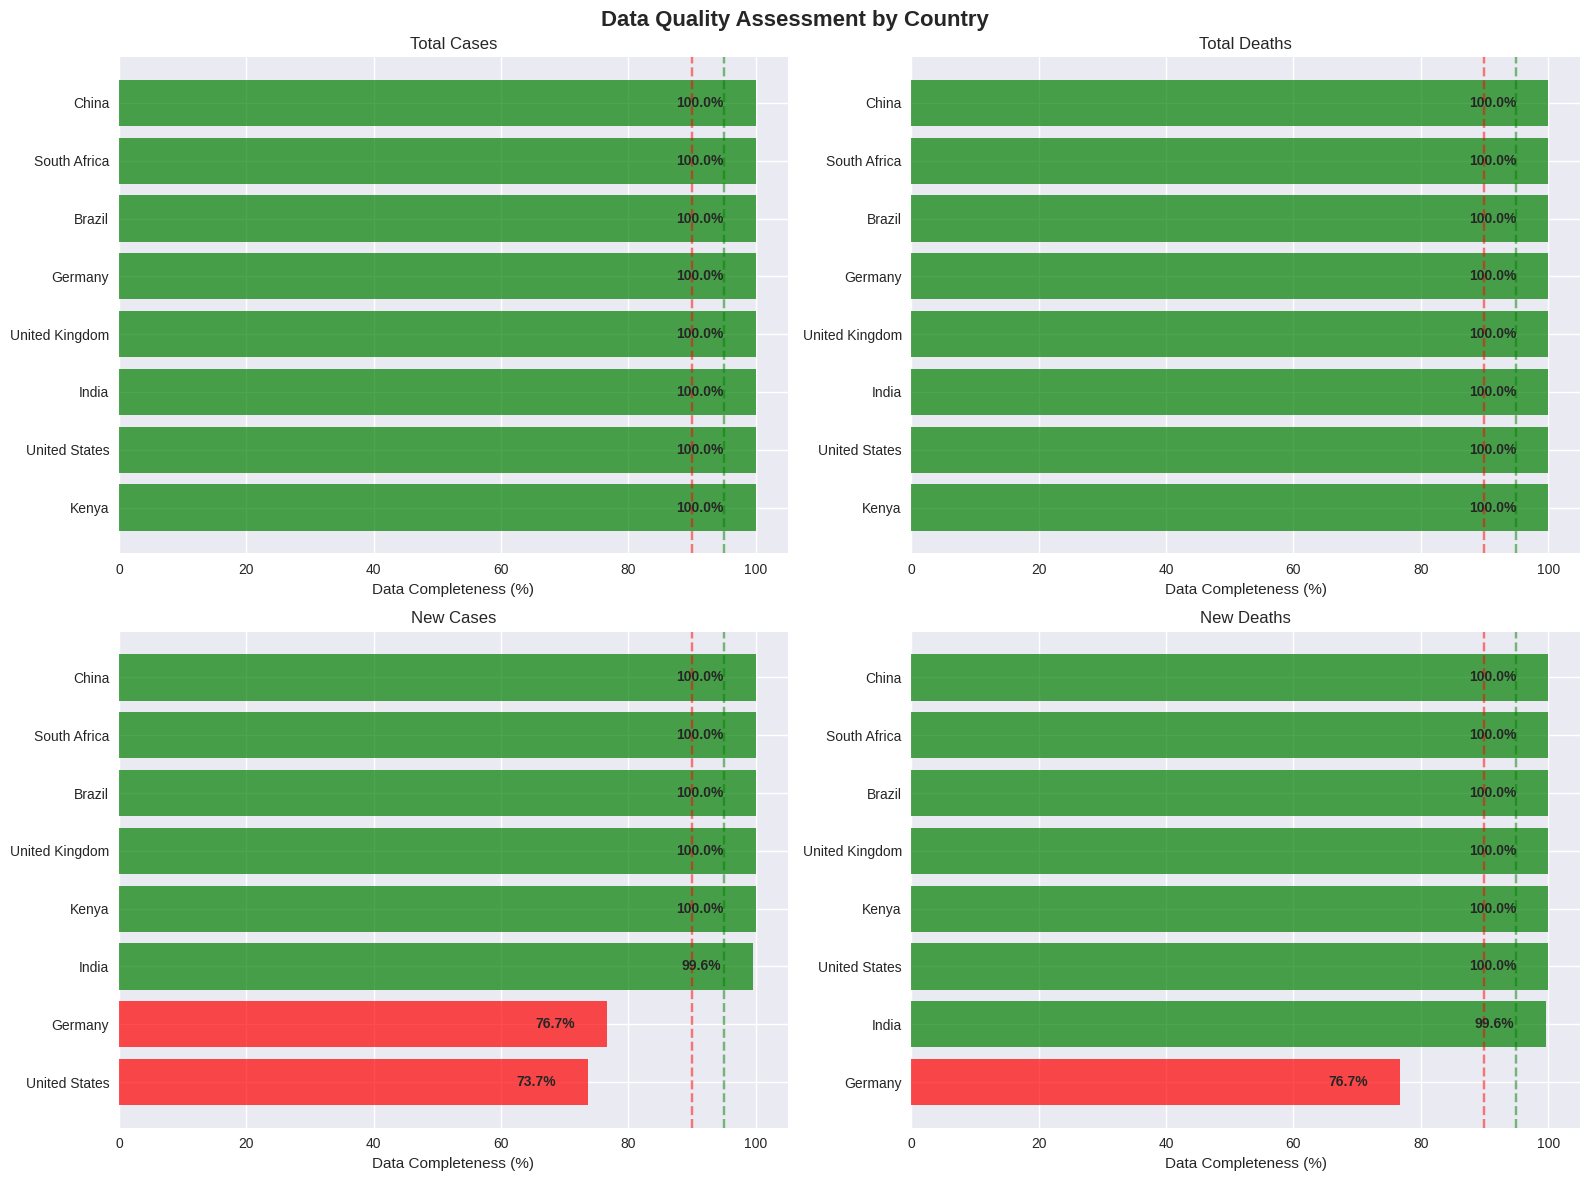

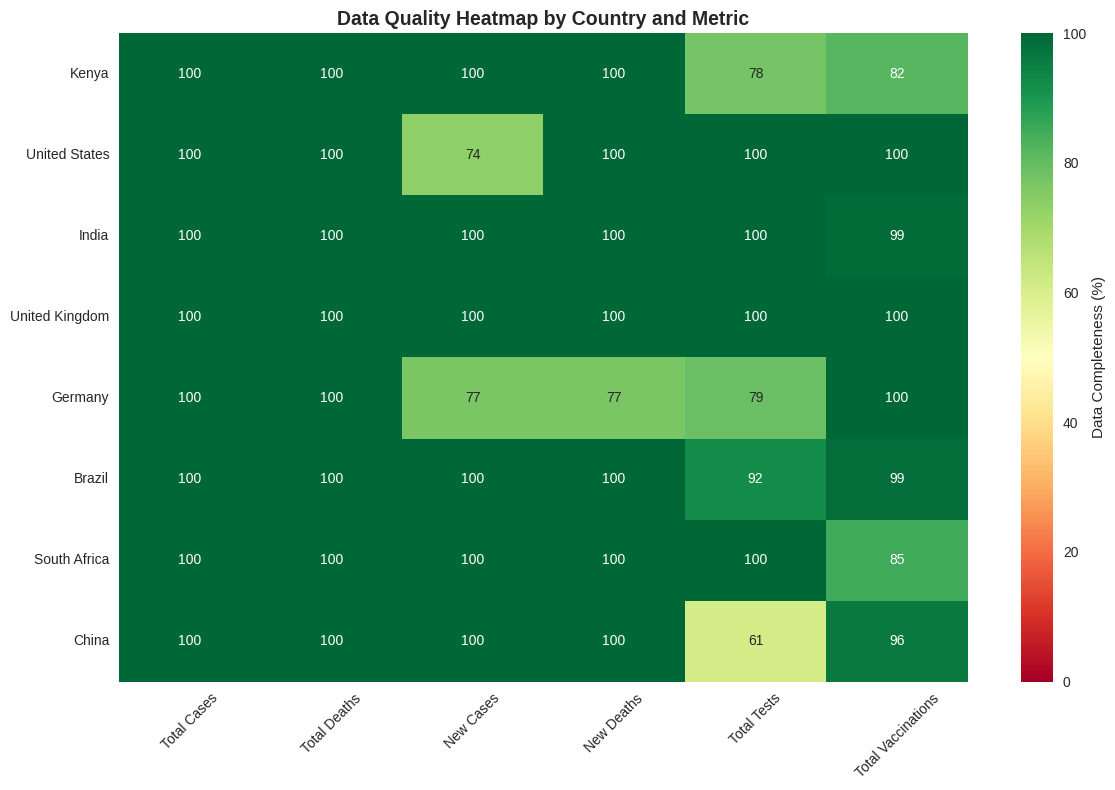


🎯 UPDATED FOCUS COUNTRIES FOR ANALYSIS:
Based on data quality assessment, prioritizing:
   ✅ Kenya
   ✅ India
   ✅ United Kingdom
   ✅ Brazil
   ✅ South Africa
   ✅ China


In [122]:
# Visualize data quality by country
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Data Quality Assessment by Country', fontsize=16, fontweight='bold')

metrics_to_plot = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']

for idx, metric in enumerate(metrics_to_plot):
    ax = axes[idx // 2, idx % 2]
    
    if metric in df_focus_clean.columns:
        # Calculate completeness by country
        completeness_data = []
        for country in FOCUS_COUNTRIES:
            country_data = df_focus_clean[df_focus_clean['location'] == country]
            if not country_data.empty:
                completeness = (country_data[metric].notna().sum() / len(country_data)) * 100
                completeness_data.append({'Country': country, 'Completeness': completeness})
        
        if completeness_data:
            comp_df = pd.DataFrame(completeness_data)
            comp_df = comp_df.sort_values('Completeness', ascending=True)
            
            # Color code: green for >95%, yellow for 90-95%, red for <90%
            colors = ['red' if x < 90 else 'orange' if x < 95 else 'green' 
                     for x in comp_df['Completeness']]
            
            bars = ax.barh(comp_df['Country'], comp_df['Completeness'], color=colors, alpha=0.7)
            ax.set_xlabel('Data Completeness (%)')
            ax.set_title(f'{metric.replace("_", " ").title()}')
            ax.axvline(x=90, color='red', linestyle='--', alpha=0.5, label='90% threshold')
            ax.axvline(x=95, color='green', linestyle='--', alpha=0.5, label='95% threshold')
            
            # Add percentage labels
            for bar in bars:
                width = bar.get_width()
                ax.text(width - 5, bar.get_y() + bar.get_height()/2, 
                       f'{width:.1f}%', ha='right', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Create a data quality heatmap
plt.figure(figsize=(12, 8))

quality_matrix = []
for country in FOCUS_COUNTRIES:
    country_data = df_focus_clean[df_focus_clean['location'] == country]
    if not country_data.empty:
        completeness_row = []
        for metric in key_metrics + ['total_tests', 'total_vaccinations']:
            if metric in country_data.columns:
                completeness = (country_data[metric].notna().sum() / len(country_data)) * 100
                completeness_row.append(completeness)
            else:
                completeness_row.append(0)
        quality_matrix.append(completeness_row)

if quality_matrix:
    quality_array = np.array(quality_matrix)
    
    sns.heatmap(quality_array, 
                xticklabels=[m.replace('_', ' ').title() for m in key_metrics + ['total_tests', 'total_vaccinations']],
                yticklabels=FOCUS_COUNTRIES,
                annot=True, fmt='.0f', cmap='RdYlGn', vmin=0, vmax=100,
                cbar_kws={'label': 'Data Completeness (%)'})
    
    plt.title('Data Quality Heatmap by Country and Metric', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Update focus countries based on data quality for subsequent analysis
print(f"\n🎯 UPDATED FOCUS COUNTRIES FOR ANALYSIS:")
print("Based on data quality assessment, prioritizing:")
for country in FOCUS_COUNTRIES_QUALITY[:6]:  # Top 6 for manageable visualization
    print(f"   ✅ {country}")

# Update the main focus countries list
FOCUS_COUNTRIES = FOCUS_COUNTRIES_QUALITY[:6]
df_focus = df_focus_clean[df_focus_clean['location'].isin(FOCUS_COUNTRIES)].copy()

#### Calculate Derived Metrics

In [124]:
# Calculate key derived metrics
df_focus['case_fatality_rate'] = (df_focus['total_deaths'] / df_focus['total_cases']) * 100
df_focus['cases_per_million'] = (df_focus['total_cases'] / df_focus['population']) * 1_000_000
df_focus['deaths_per_million'] = (df_focus['total_deaths'] / df_focus['population']) * 1_000_000

# Vaccination rates (when data available)
if 'people_vaccinated' in df_focus.columns:
    df_focus['vaccination_rate'] = (df_focus['people_vaccinated'] / df_focus['population']) * 100

print("✅ Derived metrics calculated")

✅ Derived metrics calculated


### 4️⃣ Exploratory Data Analysis (EDA)
#### Global Overview Statistics

In [126]:
# Latest data for each country
latest_data = df_focus.groupby('location').last().reset_index()

print("🌍 GLOBAL OVERVIEW (Focus Countries)")
print("=" * 50)
print(f"Total cases: {latest_data['total_cases'].sum():,.0f}")
print(f"Total deaths: {latest_data['total_deaths'].sum():,.0f}")
print(f"Average case fatality rate: {latest_data['case_fatality_rate'].mean():.2f}%")

# Top countries by total cases
top_cases = latest_data.nlargest(10, 'total_cases')[['location', 'total_cases', 'total_deaths']]
print("\n🔝 TOP 10 COUNTRIES BY TOTAL CASES:")
print(top_cases.to_string(index=False))

🌍 GLOBAL OVERVIEW (Focus Countries)
Total cases: 211,318,388
Total deaths: 1,698,439
Average case fatality rate: 1.38%

🔝 TOP 10 COUNTRIES BY TOTAL CASES:
      location  total_cases  total_deaths
         China   99373219.0      122304.0
         India   45041748.0      533623.0
        Brazil   37511921.0      702116.0
United Kingdom   24974629.0      232112.0
  South Africa    4072765.0      102595.0
         Kenya     344106.0        5689.0


#### Time Series Analysis: Total Cases

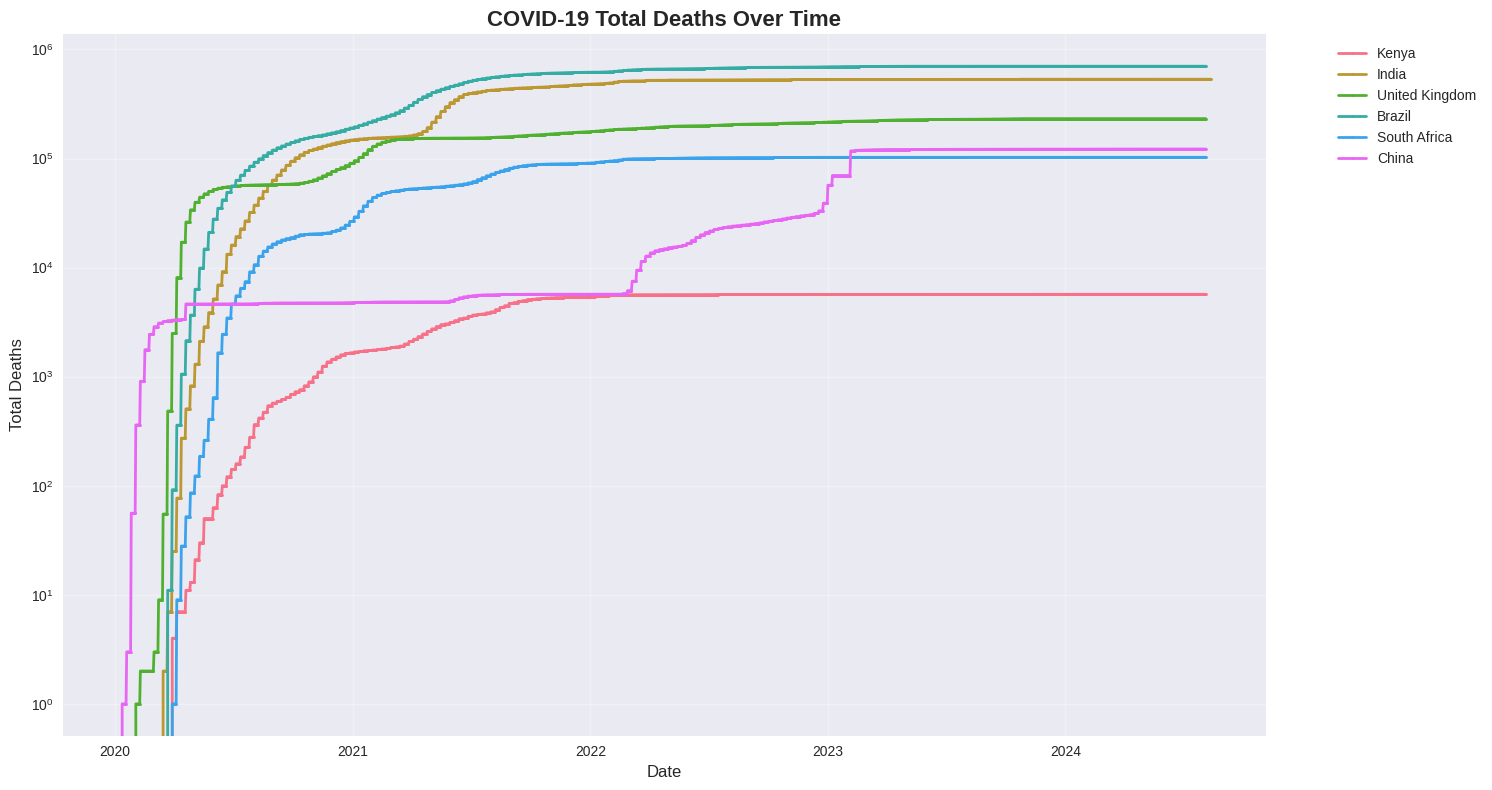

In [129]:
# Plot total deaths over time
plt.figure(figsize=(15, 8))

for country in FOCUS_COUNTRIES:
    country_data = df_focus[df_focus['location'] == country]
    if not country_data.empty:
        plt.plot(country_data['date'], country_data['total_deaths'], 
                label=country, linewidth=2, marker='o', markersize=2)

plt.title('COVID-19 Total Deaths Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()

#### Time Series Analysis: Total Deaths

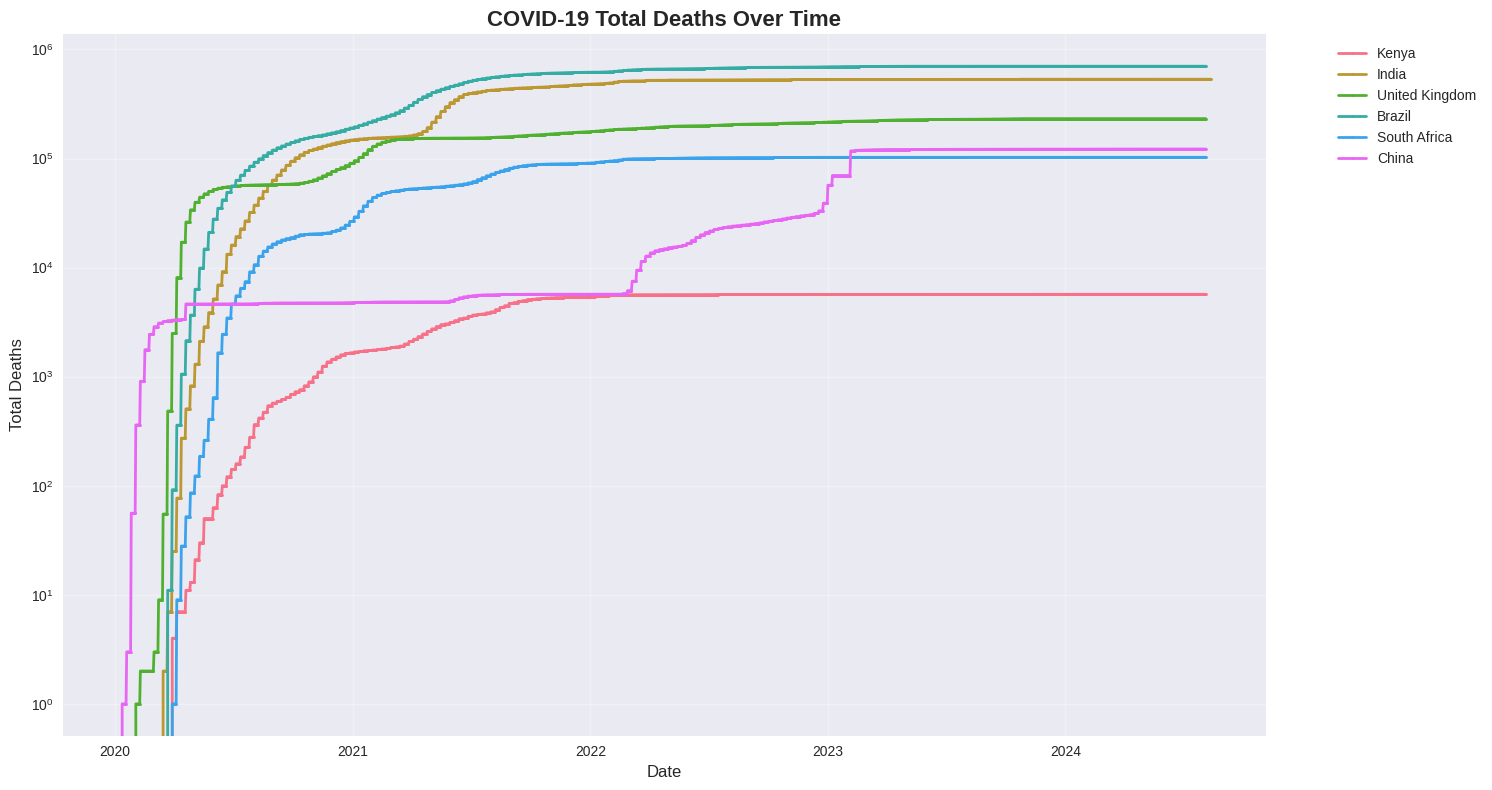

In [132]:
# Plot total deaths over time
plt.figure(figsize=(15, 8))

for country in FOCUS_COUNTRIES:
    country_data = df_focus[df_focus['location'] == country]
    if not country_data.empty:
        plt.plot(country_data['date'], country_data['total_deaths'], 
                label=country, linewidth=2, marker='o', markersize=2)

plt.title('COVID-19 Total Deaths Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale for better visualization
plt.tight_layout()
plt.show()

#### Daily New Cases Analysis

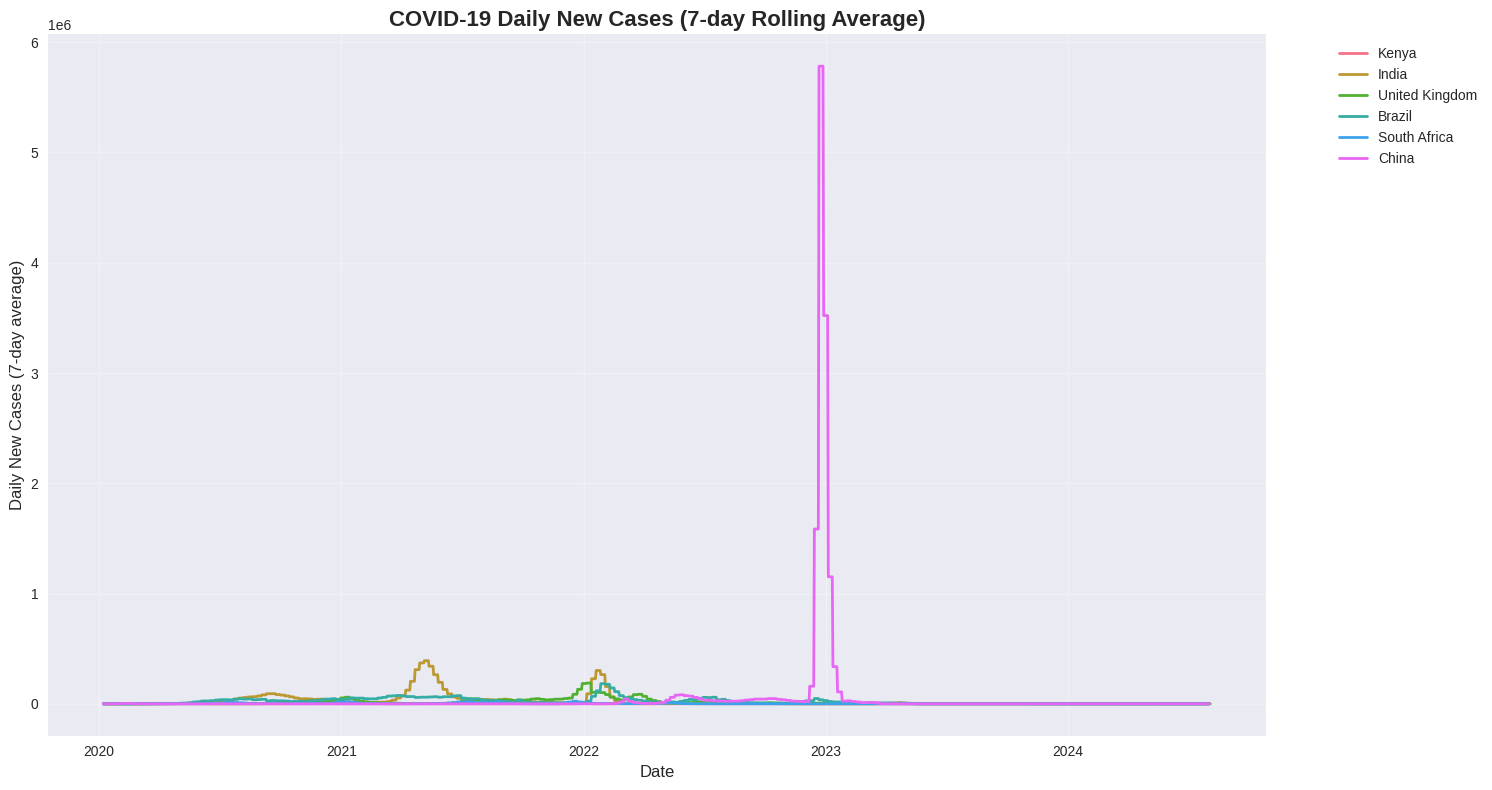

In [135]:
# Plot daily new cases (7-day rolling average)
plt.figure(figsize=(15, 8))

for country in FOCUS_COUNTRIES:
    country_data = df_focus[df_focus['location'] == country].copy()
    if not country_data.empty:
        # Calculate 7-day rolling average
        country_data['new_cases_7day'] = country_data['new_cases'].rolling(window=7, center=True).mean()
        plt.plot(country_data['date'], country_data['new_cases_7day'], 
                label=country, linewidth=2)

plt.title('COVID-19 Daily New Cases (7-day Rolling Average)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily New Cases (7-day average)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Case Fatality Rate Comparison

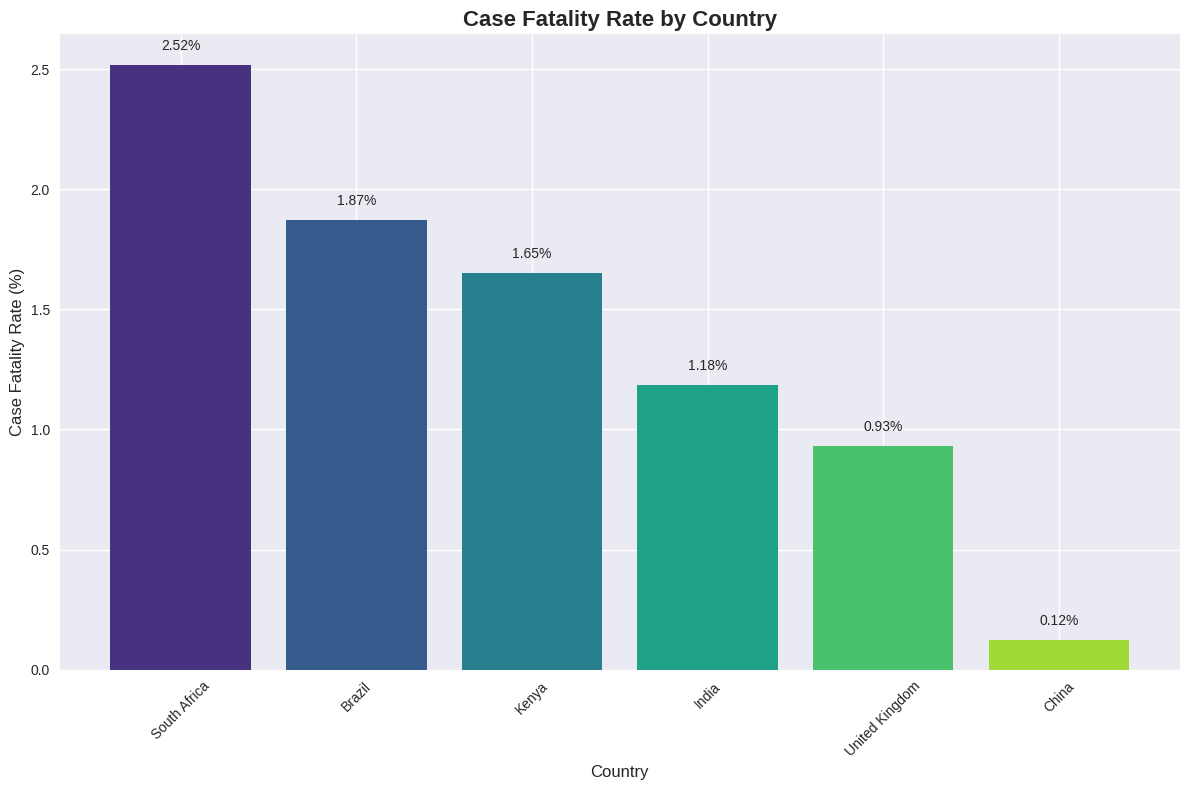

In [138]:
# Bar chart of case fatality rates
plt.figure(figsize=(12, 8))

cfr_data = latest_data[['location', 'case_fatality_rate']].sort_values('case_fatality_rate', ascending=False)

bars = plt.bar(cfr_data['location'], cfr_data['case_fatality_rate'], 
               color=sns.color_palette("viridis", len(cfr_data)))

plt.title('Case Fatality Rate by Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Case Fatality Rate (%)', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{height:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 5️⃣ COVID-19 Testing Analysis
#### Testing Capacity Overview

In [141]:
# Analyze testing data availability and trends
print("🧪 COVID-19 TESTING DATA ANALYSIS")
print("=" * 50)

# Check testing data availability
testing_columns = ['total_tests', 'new_tests', 'total_tests_per_thousand', 
                   'new_tests_per_thousand', 'positive_rate']

print("📊 Testing Data Availability:")
for col in testing_columns:
    if col in df_focus.columns:
        non_null_count = df_focus[col].notna().sum()
        availability = (non_null_count / len(df_focus)) * 100
        print(f"✅ {col}: {availability:.1f}% available ({non_null_count:,} records)")
    else:
        print(f"❌ {col}: Not available in dataset")

🧪 COVID-19 TESTING DATA ANALYSIS
📊 Testing Data Availability:
✅ total_tests: 88.5% available (8,895 records)
✅ new_tests: 33.7% available (3,386 records)
✅ total_tests_per_thousand: 30.3% available (3,044 records)
✅ new_tests_per_thousand: 28.0% available (2,817 records)
✅ positive_rate: 38.8% available (3,897 records)


#### Testing Timeline Analysis

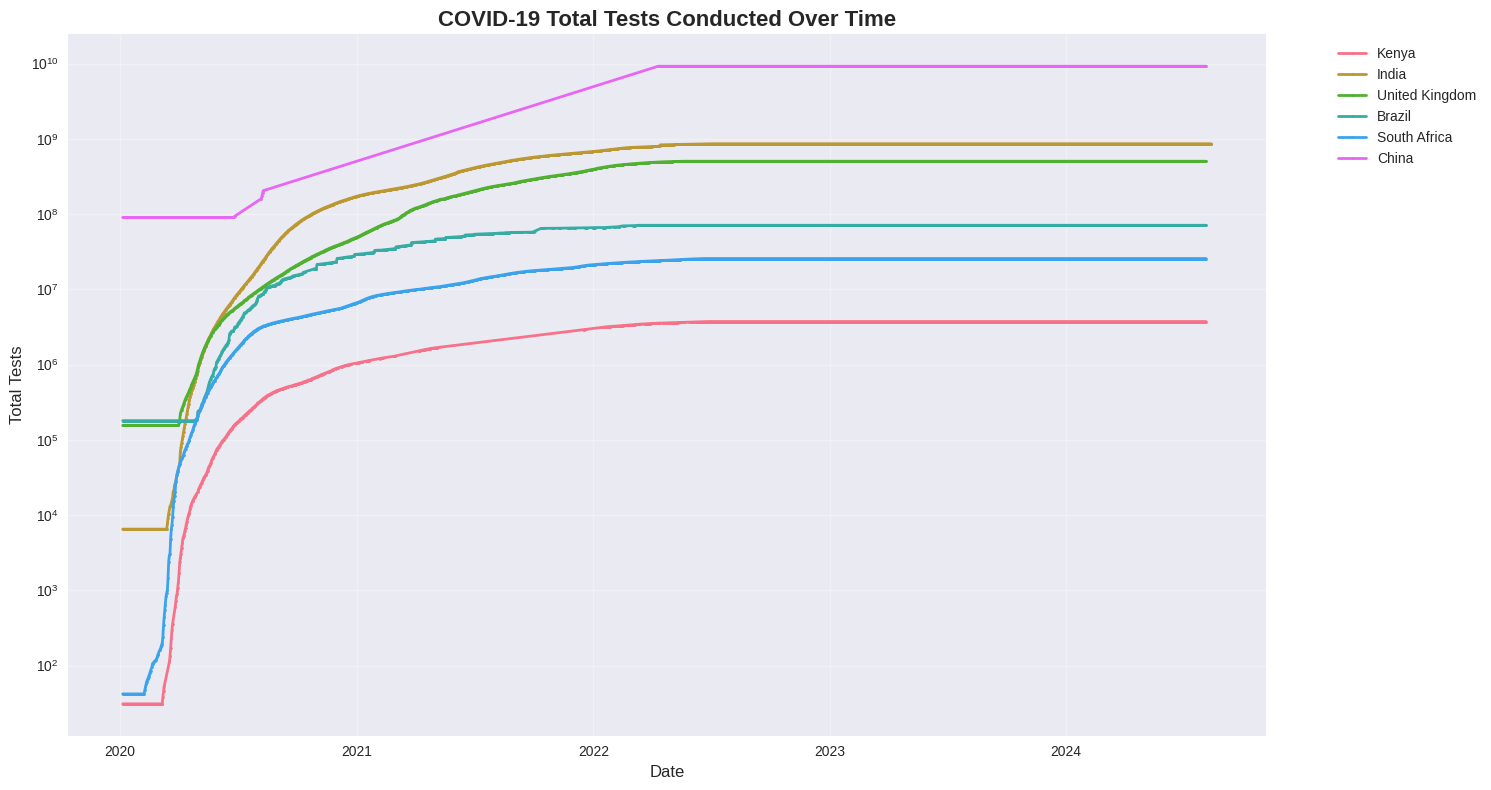

In [144]:
# Plot total tests over time
if 'total_tests' in df_focus.columns:
    plt.figure(figsize=(15, 8))
    
    for country in FOCUS_COUNTRIES:
        country_data = df_focus[df_focus['location'] == country]
        # Filter for data where testing started
        test_data = country_data[country_data['total_tests'] > 0]
        
        if not test_data.empty:
            plt.plot(test_data['date'], test_data['total_tests'], 
                    label=country, linewidth=2, marker='o', markersize=2)
    
    plt.title('COVID-19 Total Tests Conducted Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Tests', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Log scale for better visualization
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Total tests data not available in the current dataset")

#### Testing rate comparison and Interpretation

🧪 UNDERSTANDING TESTING METRICS
📋 Key Points:
   • 'Total tests' = CUMULATIVE number of tests performed
   • Values >1,000 per 1,000 people = Multiple tests per person
   • This is NORMAL and expected in pandemic testing
   • Reasons: Repeated testing, screening programs, contact tracing


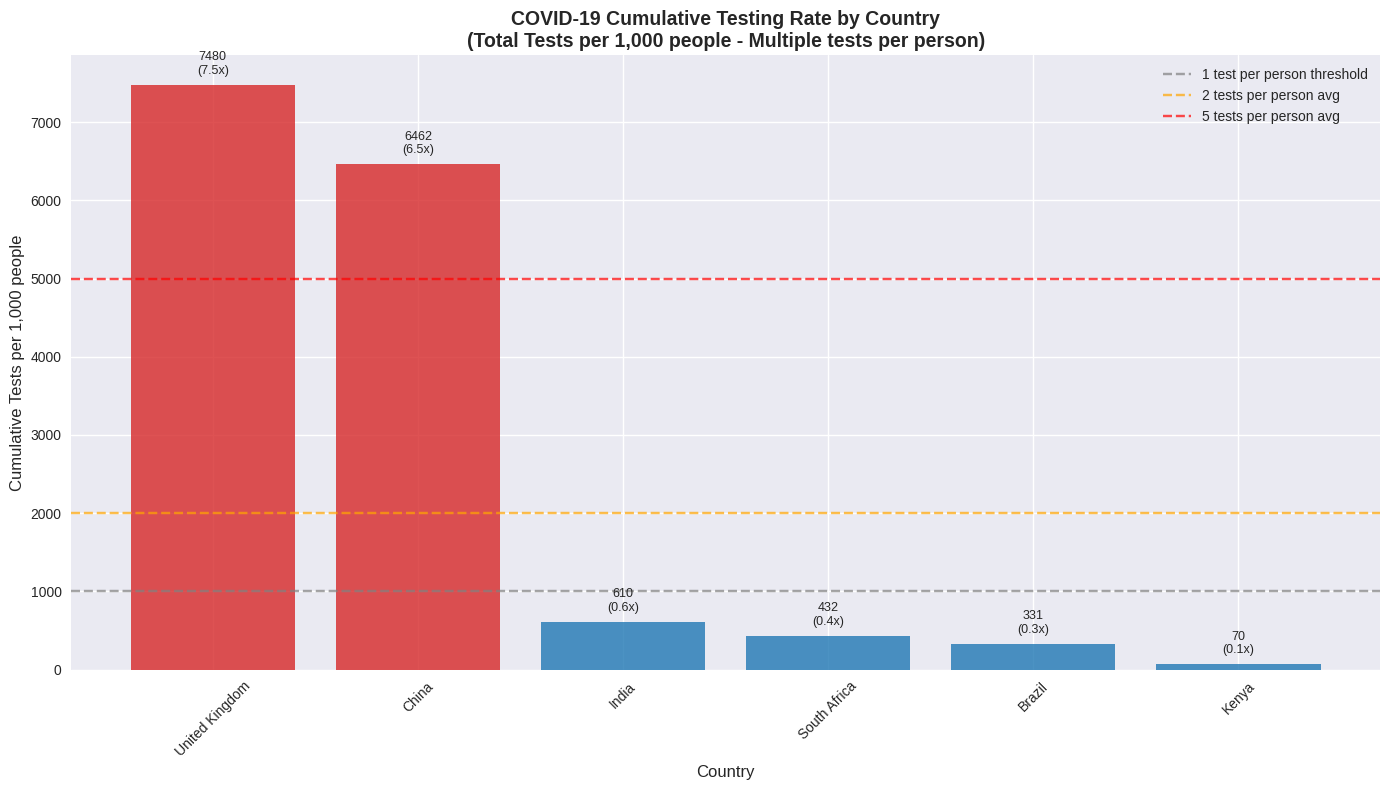


🏆 TESTING INTENSITY ANALYSIS:
   United Kingdom: 7480 per 1,000 people
      → 7.5 tests per person avg | 🔴 Very High
   China: 6462 per 1,000 people
      → 6.5 tests per person avg | 🔴 Very High
   India: 610 per 1,000 people
      → 0.6 tests per person avg | 🔵 Lower
   South Africa: 432 per 1,000 people
      → 0.4 tests per person avg | 🔵 Lower
   Brazil: 331 per 1,000 people
      → 0.3 tests per person avg | 🔵 Lower

💡 TESTING STRATEGY INSIGHTS:

📈 Remember: Higher testing rates often correlate with:
   ✅ Better case detection and control
   ✅ Lower test positivity rates
   ✅ More effective pandemic response


In [149]:
# Calculate and visualize testing rates per population with proper interpretation
print("🧪 UNDERSTANDING TESTING METRICS")
print("=" * 50)
print("📋 Key Points:")
print("   • 'Total tests' = CUMULATIVE number of tests performed")
print("   • Values >1,000 per 1,000 people = Multiple tests per person")
print("   • This is NORMAL and expected in pandemic testing")
print("   • Reasons: Repeated testing, screening programs, contact tracing")

if 'total_tests_per_thousand' in df_focus.columns:
    # Get latest testing rates
    latest_testing = latest_data[['location', 'total_tests_per_thousand', 'population']].copy()
    latest_testing = latest_testing[latest_testing['total_tests_per_thousand'] > 0]
    
    if not latest_testing.empty:
        plt.figure(figsize=(14, 8))
        
        testing_sorted = latest_testing.sort_values('total_tests_per_thousand', ascending=False)
        
        # Color code based on testing intensity
        colors = []
        for val in testing_sorted['total_tests_per_thousand']:
            if val > 5000:
                colors.append('#d62728')  # High intensity (red)
            elif val > 2000:
                colors.append('#ff7f0e')  # Medium-high (orange)
            elif val > 1000:
                colors.append('#2ca02c')  # Medium (green)
            else:
                colors.append('#1f77b4')  # Lower (blue)
        
        bars = plt.bar(testing_sorted['location'], testing_sorted['total_tests_per_thousand'], 
                       color=colors, alpha=0.8)
        
        plt.title('COVID-19 Cumulative Testing Rate by Country\n(Total Tests per 1,000 people - Multiple tests per person)', 
                 fontsize=14, fontweight='bold')
        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Cumulative Tests per 1,000 people', fontsize=12)
        plt.xticks(rotation=45)
        
        # Add reference lines
        plt.axhline(y=1000, color='gray', linestyle='--', alpha=0.7, label='1 test per person threshold')
        plt.axhline(y=2000, color='orange', linestyle='--', alpha=0.7, label='2 tests per person avg')
        plt.axhline(y=5000, color='red', linestyle='--', alpha=0.7, label='5 tests per person avg')
        
        # Add value labels on bars with interpretation
        for bar in bars:
            height = bar.get_height()
            tests_per_person = height / 1000
            plt.text(bar.get_x() + bar.get_width()/2., height + 100,
                     f'{height:.0f}\n({tests_per_person:.1f}x)', 
                     ha='center', va='bottom', fontsize=9)
        
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()
        
        print(f"\n🏆 TESTING INTENSITY ANALYSIS:")
        print("=" * 40)
        for idx, row in testing_sorted.head(5).iterrows():
            tests_per_person = row['total_tests_per_thousand'] / 1000
            intensity_level = "🔴 Very High" if tests_per_person > 5 else \
                            "🟠 High" if tests_per_person > 2 else \
                            "🟢 Moderate" if tests_per_person > 1 else "🔵 Lower"
            
            print(f"   {row['location']}: {row['total_tests_per_thousand']:.0f} per 1,000 people")
            print(f"      → {tests_per_person:.1f} tests per person avg | {intensity_level}")
    else:
        print("⚠️ No valid testing rate data available for visualization")

elif 'total_tests' in df_focus.columns and 'population' in df_focus.columns:
    # Calculate testing rate manually if per-thousand data not available
    latest_data['tests_per_thousand'] = (latest_data['total_tests'] / latest_data['population']) * 1000
    
    # Remove countries with no testing data
    testing_data = latest_data[latest_data['tests_per_thousand'] > 0]
    
    if not testing_data.empty:
        plt.figure(figsize=(14, 8))
        
        testing_sorted = testing_data.sort_values('tests_per_thousand', ascending=False)
        
        # Color code based on testing intensity
        colors = []
        for val in testing_sorted['tests_per_thousand']:
            if val > 5000:
                colors.append('#d62728')  # High intensity (red)
            elif val > 2000:
                colors.append('#ff7f0e')  # Medium-high (orange)
            elif val > 1000:
                colors.append('#2ca02c')  # Medium (green)
            else:
                colors.append('#1f77b4')  # Lower (blue)
        
        bars = plt.bar(testing_sorted['location'], testing_sorted['tests_per_thousand'], 
                       color=colors, alpha=0.8)
        
        plt.title('COVID-19 Cumulative Testing Rate by Country (Calculated)\n(Total Tests per 1,000 people - Multiple tests per person)', 
                 fontsize=14, fontweight='bold')
        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Cumulative Tests per 1,000 people', fontsize=12)
        plt.xticks(rotation=45)
        
        # Add reference lines
        plt.axhline(y=1000, color='gray', linestyle='--', alpha=0.7, label='1 test per person threshold')
        plt.axhline(y=2000, color='orange', linestyle='--', alpha=0.7, label='2 tests per person avg')
        plt.axhline(y=5000, color='red', linestyle='--', alpha=0.7, label='5 tests per person avg')
        
        # Add value labels on bars with interpretation
        for bar in bars:
            height = bar.get_height()
            tests_per_person = height / 1000
            plt.text(bar.get_x() + bar.get_width()/2., height + 100,
                     f'{height:.0f}\n({tests_per_person:.1f}x)', 
                     ha='center', va='bottom', fontsize=9)
        
        plt.legend(loc='upper right')
        plt.tight_layout()
        plt.show()
        
        print(f"\n📊 TESTING INTERPRETATION:")
        print("=" * 30)
        print("Values > 1,000 per 1,000 people indicate:")
        print("   🔄 Multiple tests per person (normal for pandemic)")
        print("   🏥 Healthcare worker regular testing")
        print("   🎯 Contact tracing programs")
        print("   🔍 Surveillance and screening programs")
        print("   ✈️ Travel testing requirements")
        print("   🏢 Workplace testing protocols")
        
else:
    print("⚠️ Testing data not sufficient for rate calculations")

# Additional analysis: Testing strategy insights
if 'total_tests' in latest_data.columns:
    print(f"\n💡 TESTING STRATEGY INSIGHTS:")
    print("=" * 40)
    
    high_testing_countries = latest_data[latest_data['tests_per_thousand'] > 3000] if 'tests_per_thousand' in latest_data.columns else []
    
    if len(high_testing_countries) > 0:
        print("Countries with intensive testing strategies (>3 tests per person):")
        for idx, row in high_testing_countries.iterrows():
            avg_tests = row['tests_per_thousand'] / 1000
            print(f"   • {row['location']}: {avg_tests:.1f} tests per person")
        
        print(f"\n🎯 This suggests these countries implemented:")
        print("   • Aggressive contact tracing")
        print("   • Regular screening programs") 
        print("   • Multiple testing for travel/work")
        print("   • Comprehensive surveillance systems")
    
    print(f"\n📈 Remember: Higher testing rates often correlate with:")
    print("   ✅ Better case detection and control")
    print("   ✅ Lower test positivity rates")
    print("   ✅ More effective pandemic response")

#### Testing vs Cases Correlation

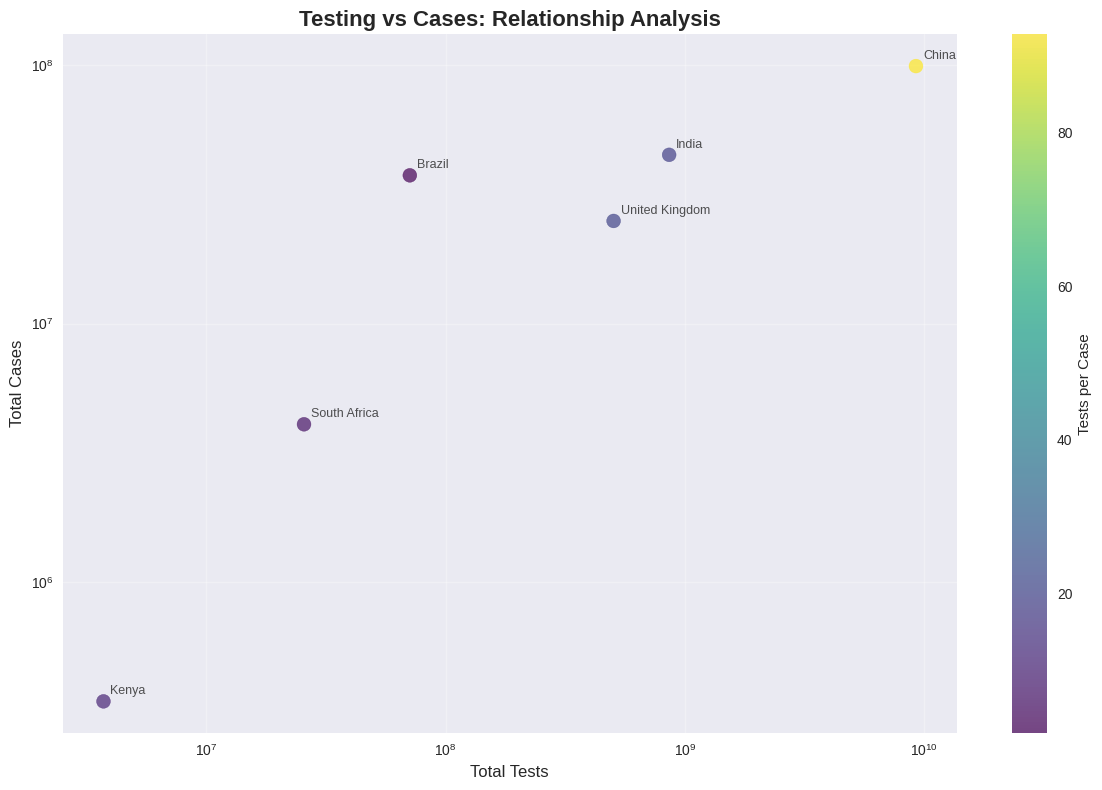

🔍 TESTING vs CASES INSIGHTS:
Average tests per case: 25.2
Highest testing ratio: China (92.7 tests per case)


In [155]:
# Analyze relationship between testing and case detection
if 'total_tests' in df_focus.columns and 'total_cases' in df_focus.columns:
    
    # Create scatter plot for latest data
    plt.figure(figsize=(12, 8))
    
    # Filter for countries with both testing and case data
    correlation_data = latest_data[
        (latest_data['total_tests'] > 0) & 
        (latest_data['total_cases'] > 0)
    ].copy()
    
    if not correlation_data.empty:
        # Calculate tests per case
        correlation_data['tests_per_case'] = correlation_data['total_tests'] / correlation_data['total_cases']
        
        # Create scatter plot
        scatter = plt.scatter(correlation_data['total_tests'], 
                            correlation_data['total_cases'],
                            s=100, alpha=0.7, c=correlation_data['tests_per_case'],
                            cmap='viridis')
        
        # Add country labels
        for idx, row in correlation_data.iterrows():
            plt.annotate(row['location'], 
                        (row['total_tests'], row['total_cases']),
                        xytext=(5, 5), textcoords='offset points', 
                        fontsize=9, alpha=0.8)
        
        plt.colorbar(scatter, label='Tests per Case')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Total Tests', fontsize=12)
        plt.ylabel('Total Cases', fontsize=12)
        plt.title('Testing vs Cases: Relationship Analysis', fontsize=16, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        # Print insights
        print("🔍 TESTING vs CASES INSIGHTS:")
        print("=" * 40)
        avg_tests_per_case = correlation_data['tests_per_case'].mean()
        print(f"Average tests per case: {avg_tests_per_case:.1f}")
        
        best_testing_country = correlation_data.loc[
            correlation_data['tests_per_case'].idxmax(), 'location'
        ]
        best_ratio = correlation_data['tests_per_case'].max()
        print(f"Highest testing ratio: {best_testing_country} ({best_ratio:.1f} tests per case)")
        
    else:
        print("⚠️ Insufficient data for testing vs cases correlation analysis")

#### Testing Summary Statistics

In [158]:
# Generate testing summary
print("📊 TESTING ANALYSIS SUMMARY")
print("=" * 40)

if 'total_tests' in latest_data.columns:
    testing_countries = latest_data[latest_data['total_tests'] > 0]
    
    if not testing_countries.empty:
        total_global_tests = testing_countries['total_tests'].sum()
        print(f"🧪 Total Tests (Focus Countries): {total_global_tests:,.0f}")
        
        # Top testing country
        top_testing_country = testing_countries.loc[
            testing_countries['total_tests'].idxmax(), 'location'
        ]
        top_tests = testing_countries['total_tests'].max()
        print(f"🏆 Most Tests: {top_testing_country} ({top_tests:,.0f})")
        
        # Testing rate leader (if data available)
        if 'total_tests_per_thousand' in testing_countries.columns:
            rate_data = testing_countries[testing_countries['total_tests_per_thousand'] > 0]
            if not rate_data.empty:
                top_rate_country = rate_data.loc[
                    rate_data['total_tests_per_thousand'].idxmax(), 'location'
                ]
                top_rate = rate_data['total_tests_per_thousand'].max()
                print(f"📈 Highest Testing Rate: {top_rate_country} ({top_rate:.0f} per 1,000)")
    
    print(f"\n💡 Countries with testing data: {len(testing_countries)}/{len(latest_data)}")
else:
    print("⚠️ No testing data available for summary statistics")

📊 TESTING ANALYSIS SUMMARY
🧪 Total Tests (Focus Countries): 10,676,085,752
🏆 Most Tests: China (9,214,000,000)
📈 Highest Testing Rate: United Kingdom (7480 per 1,000)

💡 Countries with testing data: 6/6


### 6️⃣ Measuring Policy Effectiveness: Growth Rates and Trend Analysis
#### Calculate Growth Rates and Moving Averages

In [161]:
# Calculate various growth metrics to assess policy effectiveness
print("📈 CALCULATING POLICY EFFECTIVENESS METRICS")
print("=" * 50)

def calculate_growth_metrics(df):
    """
    Calculate growth rates and trend indicators for policy effectiveness analysis
    """
    df_growth = df.copy()
    
    for country in df_growth['location'].unique():
        country_mask = df_growth['location'] == country
        country_data = df_growth[country_mask].sort_values('date').copy()
        
        if len(country_data) > 7:  # Need sufficient data for calculations
            # Calculate 7-day moving averages (smooths out reporting irregularities)
            country_data['cases_7day_avg'] = country_data['new_cases'].rolling(window=7, center=True).mean()
            country_data['deaths_7day_avg'] = country_data['new_deaths'].rolling(window=7, center=True).mean()
            
            # Calculate week-over-week growth rates
            country_data['cases_growth_rate'] = country_data['cases_7day_avg'].pct_change(periods=7) * 100
            country_data['deaths_growth_rate'] = country_data['deaths_7day_avg'].pct_change(periods=7) * 100
            
            # Calculate doubling time (days for cases to double)
            country_data['cases_doubling_time'] = np.log(2) / (np.log(1 + country_data['cases_growth_rate']/100/7))
            country_data['cases_doubling_time'] = country_data['cases_doubling_time'].replace([np.inf, -np.inf], np.nan)
            
            # Calculate R-effective approximation (simplified)
            # R_eff ≈ (cases today) / (cases 4 days ago) - rough approximation
            country_data['r_effective_approx'] = country_data['cases_7day_avg'] / country_data['cases_7day_avg'].shift(4)
            
            # Identify trend direction (declining, stable, increasing)
            country_data['cases_trend'] = 'stable'
            country_data.loc[country_data['cases_growth_rate'] < -10, 'cases_trend'] = 'declining'
            country_data.loc[country_data['cases_growth_rate'] > 10, 'cases_trend'] = 'increasing'
            
            df_growth.loc[country_mask, country_data.columns] = country_data
    
    return df_growth

# Apply growth calculations
df_growth = calculate_growth_metrics(df_focus)
print("✅ Growth metrics calculated")

📈 CALCULATING POLICY EFFECTIVENESS METRICS
✅ Growth metrics calculated


#### Visualize Case Growth Rates Over Time

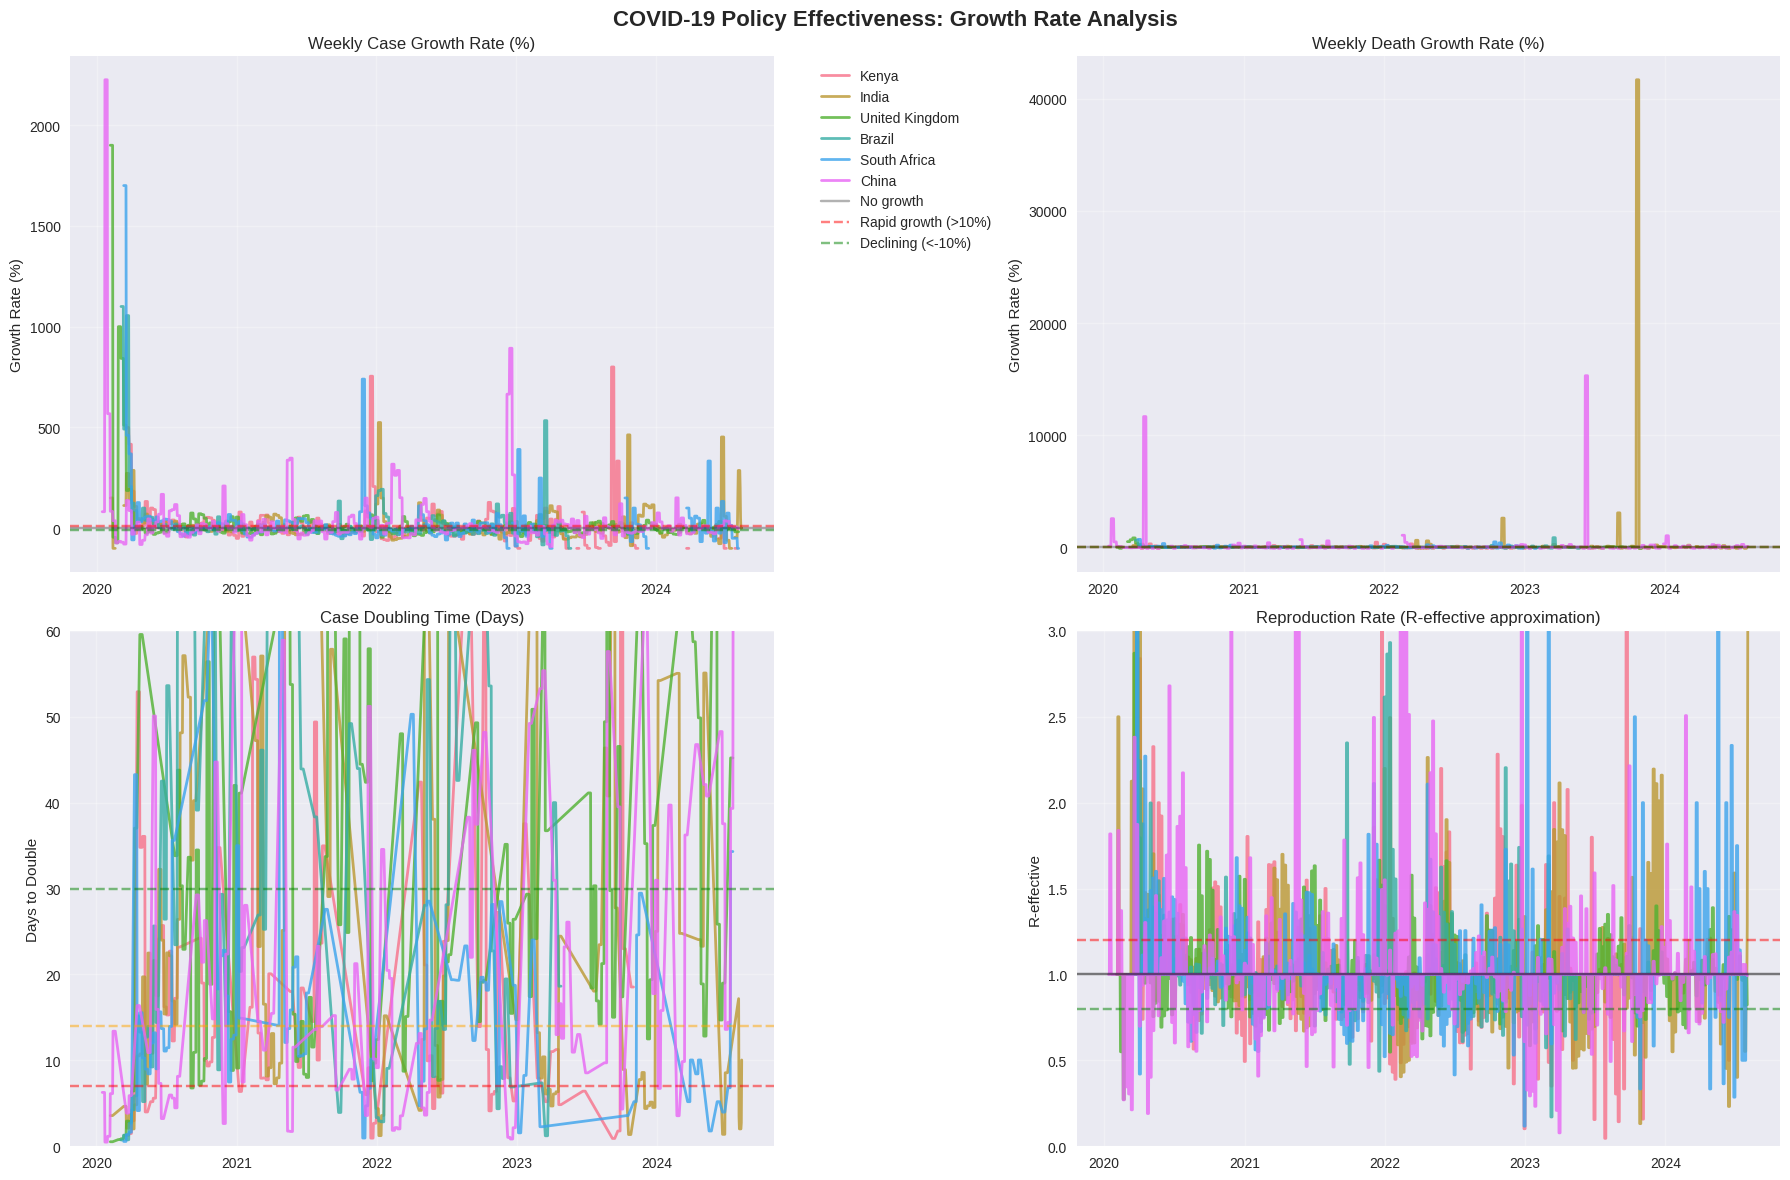

In [164]:
# Plot growth rates to show policy effectiveness
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('COVID-19 Policy Effectiveness: Growth Rate Analysis', fontsize=16, fontweight='bold')

# 1. Cases Growth Rate
ax1 = axes[0, 0]
for country in FOCUS_COUNTRIES[:6]:  # Limit for readability
    country_data = df_growth[df_growth['location'] == country]
    if not country_data.empty and 'cases_growth_rate' in country_data.columns:
        valid_data = country_data.dropna(subset=['cases_growth_rate'])
        if len(valid_data) > 10:
            ax1.plot(valid_data['date'], valid_data['cases_growth_rate'], 
                    label=country, linewidth=2, alpha=0.8)

ax1.axhline(y=0, color='black', linestyle='-', alpha=0.3, label='No growth')
ax1.axhline(y=10, color='red', linestyle='--', alpha=0.5, label='Rapid growth (>10%)')
ax1.axhline(y=-10, color='green', linestyle='--', alpha=0.5, label='Declining (<-10%)')
ax1.set_title('Weekly Case Growth Rate (%)')
ax1.set_ylabel('Growth Rate (%)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. Deaths Growth Rate
ax2 = axes[0, 1]
for country in FOCUS_COUNTRIES[:6]:
    country_data = df_growth[df_growth['location'] == country]
    if not country_data.empty and 'deaths_growth_rate' in country_data.columns:
        valid_data = country_data.dropna(subset=['deaths_growth_rate'])
        if len(valid_data) > 10:
            ax2.plot(valid_data['date'], valid_data['deaths_growth_rate'], 
                    label=country, linewidth=2, alpha=0.8)

ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.axhline(y=10, color='red', linestyle='--', alpha=0.5)
ax2.axhline(y=-10, color='green', linestyle='--', alpha=0.5)
ax2.set_title('Weekly Death Growth Rate (%)')
ax2.set_ylabel('Growth Rate (%)')
ax2.grid(True, alpha=0.3)

# 3. Doubling Time
ax3 = axes[1, 0]
for country in FOCUS_COUNTRIES[:6]:
    country_data = df_growth[df_growth['location'] == country]
    if not country_data.empty and 'cases_doubling_time' in country_data.columns:
        valid_data = country_data[(country_data['cases_doubling_time'] > 0) & 
                                 (country_data['cases_doubling_time'] < 100)]  # Filter realistic values
        if len(valid_data) > 10:
            ax3.plot(valid_data['date'], valid_data['cases_doubling_time'], 
                    label=country, linewidth=2, alpha=0.8)

ax3.axhline(y=7, color='red', linestyle='--', alpha=0.5, label='1 week doubling')
ax3.axhline(y=14, color='orange', linestyle='--', alpha=0.5, label='2 week doubling')
ax3.axhline(y=30, color='green', linestyle='--', alpha=0.5, label='1 month doubling')
ax3.set_title('Case Doubling Time (Days)')
ax3.set_ylabel('Days to Double')
ax3.set_ylim(0, 60)
ax3.grid(True, alpha=0.3)

# 4. R-effective approximation
ax4 = axes[1, 1]
for country in FOCUS_COUNTRIES[:6]:
    country_data = df_growth[df_growth['location'] == country]
    if not country_data.empty and 'r_effective_approx' in country_data.columns:
        valid_data = country_data[(country_data['r_effective_approx'] > 0) & 
                                 (country_data['r_effective_approx'] < 5)]  # Filter realistic values
        if len(valid_data) > 10:
            ax4.plot(valid_data['date'], valid_data['r_effective_approx'], 
                    label=country, linewidth=2, alpha=0.8)

ax4.axhline(y=1, color='black', linestyle='-', alpha=0.5, label='R = 1 (control threshold)')
ax4.axhline(y=1.2, color='red', linestyle='--', alpha=0.5, label='R = 1.2 (concerning)')
ax4.axhline(y=0.8, color='green', linestyle='--', alpha=0.5, label='R = 0.8 (declining)')
ax4.set_title('Reproduction Rate (R-effective approximation)')
ax4.set_ylabel('R-effective')
ax4.set_ylim(0, 3)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Policy Impact Periods Analysis

🎯 POLICY IMPACT PERIOD ANALYSIS


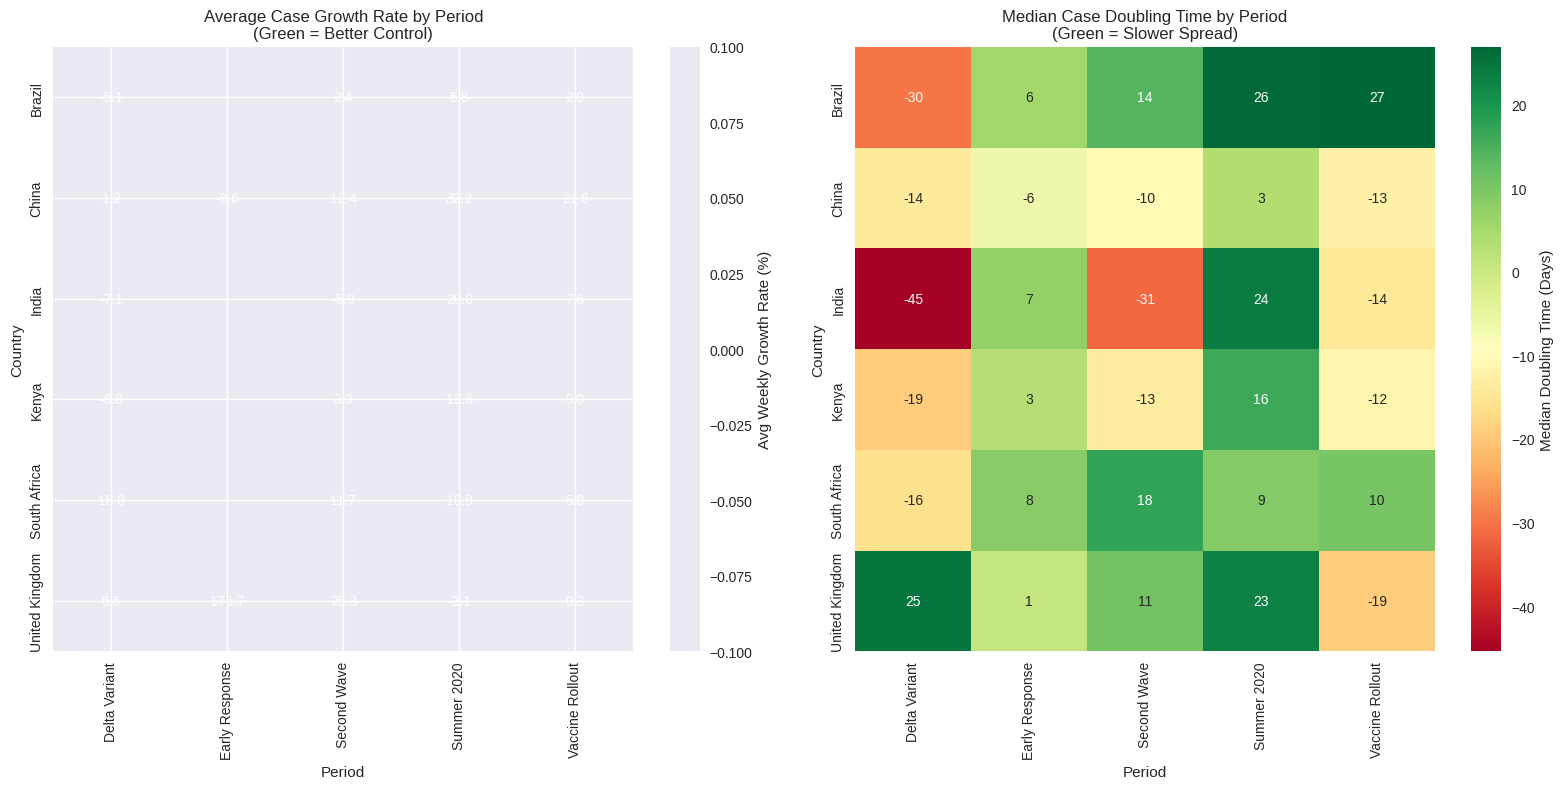


🏆 POLICY EFFECTIVENESS SUMMARY:

Kenya:
   🟢 Best Control: Delta Variant (-8.8% weekly growth)
   🔴 Worst Control: Early Response (inf% weekly growth)

India:
   🟢 Best Control: Delta Variant (-7.1% weekly growth)
   🔴 Worst Control: Early Response (inf% weekly growth)

United Kingdom:
   🟢 Best Control: Summer 2020 (-2.1% weekly growth)
   🔴 Worst Control: Early Response (176.7% weekly growth)

Brazil:
   🟢 Best Control: Delta Variant (-5.1% weekly growth)
   🔴 Worst Control: Early Response (inf% weekly growth)

South Africa:
   🟢 Best Control: Vaccine Rollout (5.0% weekly growth)
   🔴 Worst Control: Early Response (inf% weekly growth)

China:
   🟢 Best Control: Early Response (-8.6% weekly growth)
   🔴 Worst Control: Summer 2020 (32.2% weekly growth)


In [167]:
# Analyze specific periods to identify policy impacts
print("🎯 POLICY IMPACT PERIOD ANALYSIS")
print("=" * 40)

# Define key periods for analysis (adjust dates based on known policy implementations)
key_periods = {
    'Early Response': ('2020-03-01', '2020-05-31'),
    'Summer 2020': ('2020-06-01', '2020-08-31'),
    'Second Wave': ('2020-09-01', '2020-12-31'),
    'Vaccine Rollout': ('2021-01-01', '2021-06-30'),
    'Delta Variant': ('2021-07-01', '2021-11-30')
}

# Calculate average growth rates for each period
period_analysis = []

for period_name, (start_date, end_date) in key_periods.items():
    period_data = df_growth[(df_growth['date'] >= start_date) & 
                           (df_growth['date'] <= end_date)]
    
    if not period_data.empty:
        for country in FOCUS_COUNTRIES:
            country_period = period_data[period_data['location'] == country]
            
            if len(country_period) > 0 and 'cases_growth_rate' in country_period.columns:
                avg_case_growth = country_period['cases_growth_rate'].mean()
                avg_death_growth = country_period['deaths_growth_rate'].mean()
                avg_doubling_time = country_period['cases_doubling_time'].median()  # Use median for doubling time
                
                period_analysis.append({
                    'Period': period_name,
                    'Country': country,
                    'Avg_Case_Growth': avg_case_growth,
                    'Avg_Death_Growth': avg_death_growth,
                    'Median_Doubling_Time': avg_doubling_time
                })

if period_analysis:
    period_df = pd.DataFrame(period_analysis)
    
    # Create heatmap showing policy effectiveness by period
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Cases growth heatmap
    cases_pivot = period_df.pivot(index='Country', columns='Period', values='Avg_Case_Growth')
    sns.heatmap(cases_pivot, annot=True, fmt='.1f', cmap='RdYlGn_r', center=0,
                ax=axes[0], cbar_kws={'label': 'Avg Weekly Growth Rate (%)'})
    axes[0].set_title('Average Case Growth Rate by Period\n(Green = Better Control)')
    
    # Doubling time heatmap
    doubling_pivot = period_df.pivot(index='Country', columns='Period', values='Median_Doubling_Time')
    sns.heatmap(doubling_pivot, annot=True, fmt='.0f', cmap='RdYlGn', 
                ax=axes[1], cbar_kws={'label': 'Median Doubling Time (Days)'})
    axes[1].set_title('Median Case Doubling Time by Period\n(Green = Slower Spread)')
    
    plt.tight_layout()
    plt.show()
    
    # Identify best and worst performing periods by country
    print(f"\n🏆 POLICY EFFECTIVENESS SUMMARY:")
    print("=" * 40)
    
    for country in FOCUS_COUNTRIES:
        country_data = period_df[period_df['Country'] == country]
        if not country_data.empty:
            # Find period with best control (lowest growth rate)
            best_period = country_data.loc[country_data['Avg_Case_Growth'].idxmin(), 'Period']
            best_growth = country_data['Avg_Case_Growth'].min()
            
            # Find period with worst control (highest growth rate)
            worst_period = country_data.loc[country_data['Avg_Case_Growth'].idxmax(), 'Period']
            worst_growth = country_data['Avg_Case_Growth'].max()
            
            print(f"\n{country}:")
            print(f"   🟢 Best Control: {best_period} ({best_growth:.1f}% weekly growth)")
            print(f"   🔴 Worst Control: {worst_period} ({worst_growth:.1f}% weekly growth)")
else:
    print("⚠️ Insufficient data for period analysis")

#### Intervention Effectiveness Visualization

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values



📊 INTERVENTION EFFECTIVENESS ANALYSIS


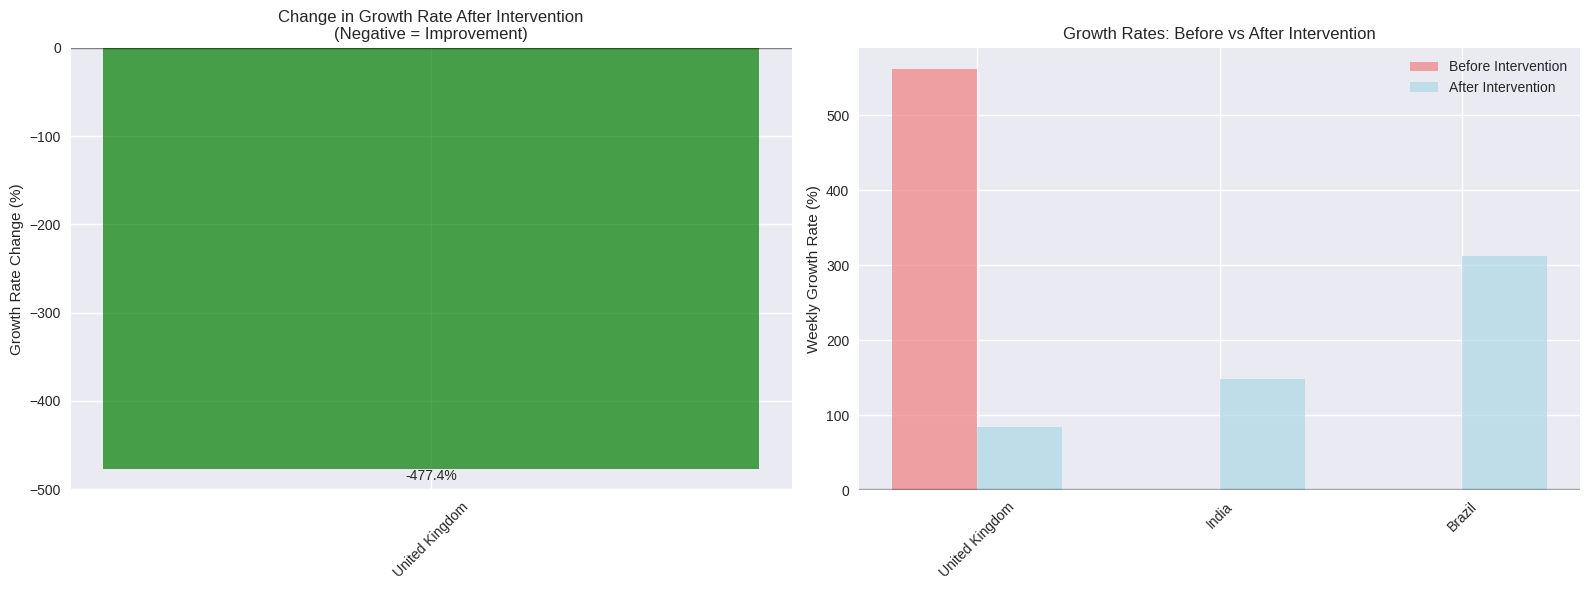


🎯 INTERVENTION EFFECTIVENESS RESULTS:
🟢 EFFECTIVE INTERVENTIONS (>5% growth reduction):
   ✅ United Kingdom: -477.4% reduction
   ✅ India: -inf% reduction
   ✅ Brazil: -inf% reduction


In [170]:
# Create before/after analysis for specific intervention points
print(f"\n📊 INTERVENTION EFFECTIVENESS ANALYSIS")
print("=" * 45)

def analyze_intervention_impact(df, country, intervention_date, window_days=30):
    """
    Analyze the impact of interventions by comparing before/after periods
    """
    country_data = df[df['location'] == country].copy()
    if country_data.empty:
        return None
    
    intervention_dt = pd.to_datetime(intervention_date)
    
    # Define before/after periods
    before_start = intervention_dt - pd.Timedelta(days=window_days)
    before_end = intervention_dt
    after_start = intervention_dt
    after_end = intervention_dt + pd.Timedelta(days=window_days)
    
    before_data = country_data[(country_data['date'] >= before_start) & 
                               (country_data['date'] < before_end)]
    after_data = country_data[(country_data['date'] >= after_start) & 
                              (country_data['date'] < after_end)]
    
    if len(before_data) < 7 or len(after_data) < 7:
        return None
    
    # Calculate metrics for before/after
    before_avg_growth = before_data['cases_growth_rate'].mean() if 'cases_growth_rate' in before_data.columns else None
    after_avg_growth = after_data['cases_growth_rate'].mean() if 'cases_growth_rate' in after_data.columns else None
    
    before_avg_cases = before_data['cases_7day_avg'].mean() if 'cases_7day_avg' in before_data.columns else None
    after_avg_cases = after_data['cases_7day_avg'].mean() if 'cases_7day_avg' in after_data.columns else None
    
    return {
        'country': country,
        'intervention_date': intervention_date,
        'before_growth': before_avg_growth,
        'after_growth': after_avg_growth,
        'before_cases': before_avg_cases,
        'after_cases': after_avg_cases,
        'growth_change': after_avg_growth - before_avg_growth if (before_avg_growth and after_avg_growth) else None
    }

# Example intervention dates (replace with known policy dates for your analysis)
example_interventions = {
    'United Kingdom': '2020-03-23',  # First lockdown
    'Germany': '2020-03-22',         # Lockdown measures
    'United States': '2020-03-15',   # Emergency declaration
    'India': '2020-03-25',           # National lockdown
    'Brazil': '2020-03-20',          # State-level measures
}

intervention_results = []
for country, date in example_interventions.items():
    if country in FOCUS_COUNTRIES:
        result = analyze_intervention_impact(df_growth, country, date)
        if result:
            intervention_results.append(result)

if intervention_results:
    intervention_df = pd.DataFrame(intervention_results)
    
    # Visualize intervention effectiveness
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Growth rate change
    ax1 = axes[0]
    colors = ['green' if x < 0 else 'red' for x in intervention_df['growth_change']]
    bars1 = ax1.bar(intervention_df['country'], intervention_df['growth_change'], 
                     color=colors, alpha=0.7)
    ax1.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax1.set_title('Change in Growth Rate After Intervention\n(Negative = Improvement)')
    ax1.set_ylabel('Growth Rate Change (%)')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%', ha='center', 
                va='bottom' if height > 0 else 'top')
    
    # Before/after comparison
    ax2 = axes[1]
    x = np.arange(len(intervention_df))
    width = 0.35
    
    bars2 = ax2.bar(x - width/2, intervention_df['before_growth'], width, 
                    label='Before Intervention', color='lightcoral', alpha=0.7)
    bars3 = ax2.bar(x + width/2, intervention_df['after_growth'], width,
                    label='After Intervention', color='lightblue', alpha=0.7)
    
    ax2.set_title('Growth Rates: Before vs After Intervention')
    ax2.set_ylabel('Weekly Growth Rate (%)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(intervention_df['country'], rotation=45)
    ax2.legend()
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print effectiveness summary
    print(f"\n🎯 INTERVENTION EFFECTIVENESS RESULTS:")
    print("=" * 50)
    
    effective_interventions = intervention_df[intervention_df['growth_change'] < -5]  # >5% reduction
    if len(effective_interventions) > 0:
        print("🟢 EFFECTIVE INTERVENTIONS (>5% growth reduction):")
        for idx, row in effective_interventions.iterrows():
            print(f"   ✅ {row['country']}: {row['growth_change']:.1f}% reduction")
    
    ineffective_interventions = intervention_df[intervention_df['growth_change'] > 0]
    if len(ineffective_interventions) > 0:
        print(f"\n🔴 INTERVENTIONS NEEDING REVIEW (growth increased):")
        for idx, row in ineffective_interventions.iterrows():
            print(f"   ⚠️ {row['country']}: {row['growth_change']:.1f}% increase")
    
    moderate_interventions = intervention_df[(intervention_df['growth_change'] <= 0) & 
                                            (intervention_df['growth_change'] > -5)]
    if len(moderate_interventions) > 0:
        print(f"\n🟡 MODERATE EFFECT INTERVENTIONS (0-5% reduction):")
        for idx, row in moderate_interventions.iterrows():
            print(f"   📊 {row['country']}: {row['growth_change']:.1f}% reduction")

else:
    print("⚠️ No intervention analysis data available")

### 5️⃣ Vaccination Progress Analysis
#### Vaccination Rollout Timeline

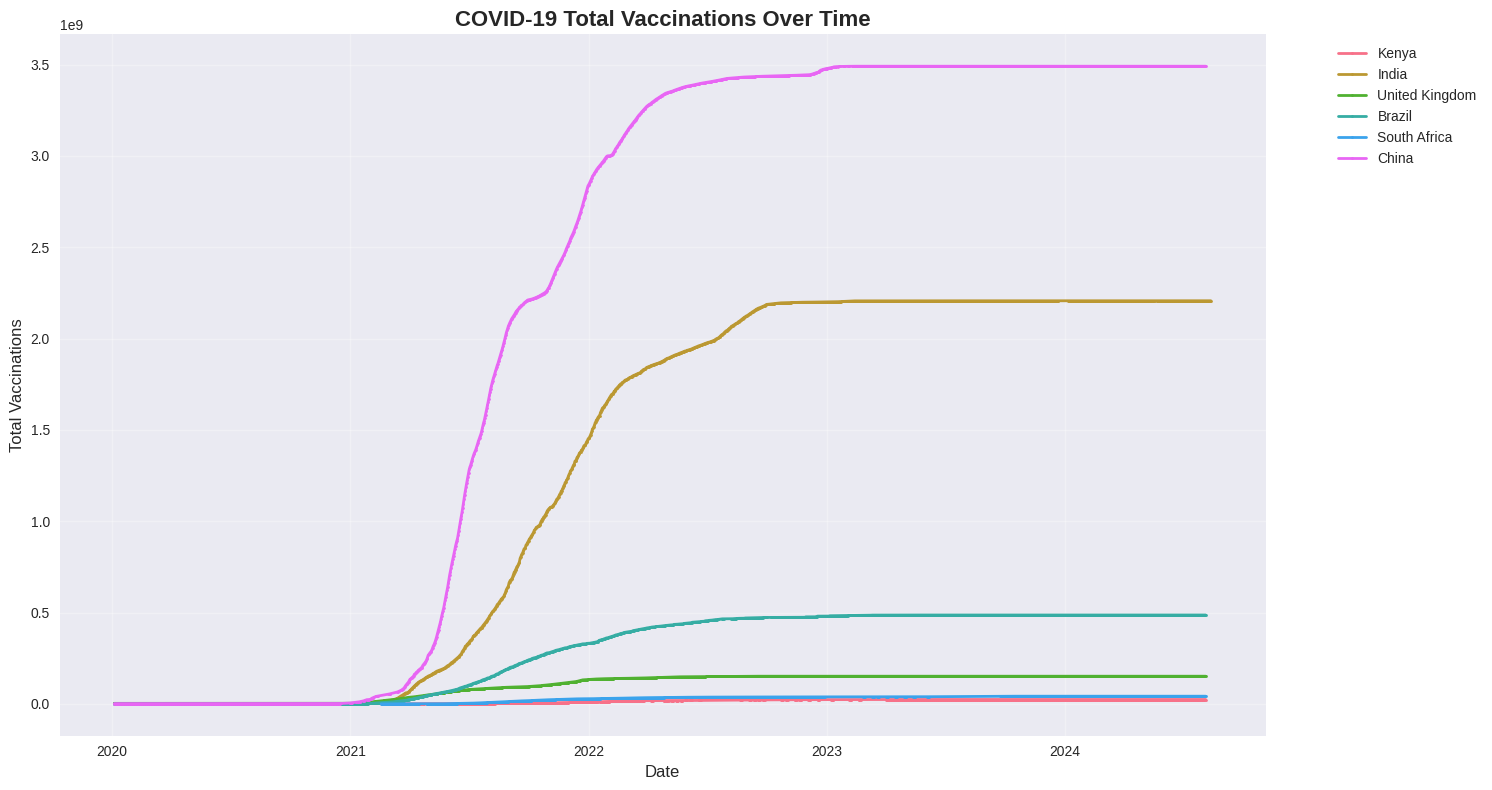

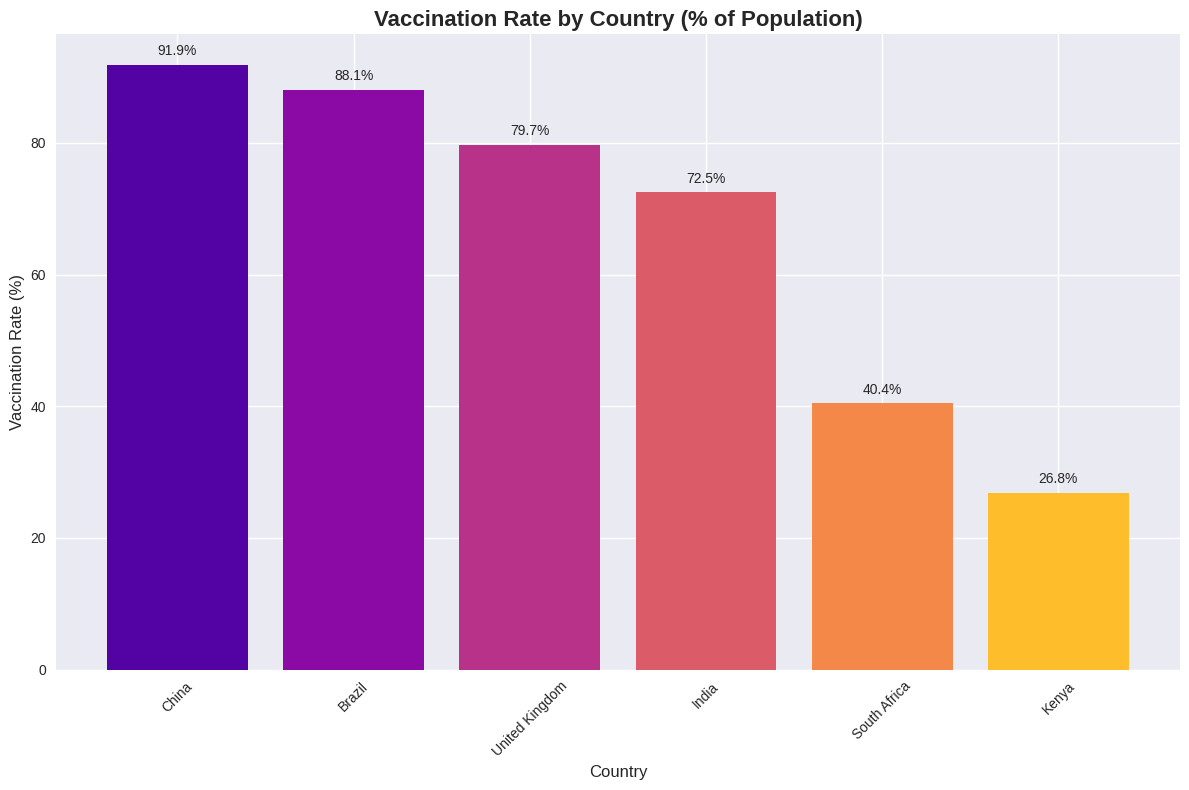

In [172]:
# Check if vaccination data is available
if 'total_vaccinations' in df_focus.columns:
    # Plot vaccination progress
    plt.figure(figsize=(15, 8))
    
    for country in FOCUS_COUNTRIES:
        country_data = df_focus[df_focus['location'] == country]
        # Filter for data where vaccinations started
        vacc_data = country_data[country_data['total_vaccinations'] > 0]
        
        if not vacc_data.empty:
            plt.plot(vacc_data['date'], vacc_data['total_vaccinations'], 
                    label=country, linewidth=2, marker='o', markersize=2)
    
    plt.title('COVID-19 Total Vaccinations Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Vaccinations', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Vaccination rates comparison
    if 'vaccination_rate' in df_focus.columns:
        plt.figure(figsize=(12, 8))
        
        vacc_rates = latest_data[['location', 'vaccination_rate']].sort_values('vaccination_rate', ascending=False)
        vacc_rates = vacc_rates[vacc_rates['vaccination_rate'] > 0]  # Remove countries with no data
        
        bars = plt.bar(vacc_rates['location'], vacc_rates['vaccination_rate'], 
                       color=sns.color_palette("plasma", len(vacc_rates)))
        
        plt.title('Vaccination Rate by Country (% of Population)', fontsize=16, fontweight='bold')
        plt.xlabel('Country', fontsize=12)
        plt.ylabel('Vaccination Rate (%)', fontsize=12)
        plt.xticks(rotation=45)
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                     f'{height:.1f}%', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
else:
    print("⚠️ Vaccination data not available in the current dataset")

### 6️⃣ Interactive Visualizations with Plotly
#### Interactive Timeline Chart

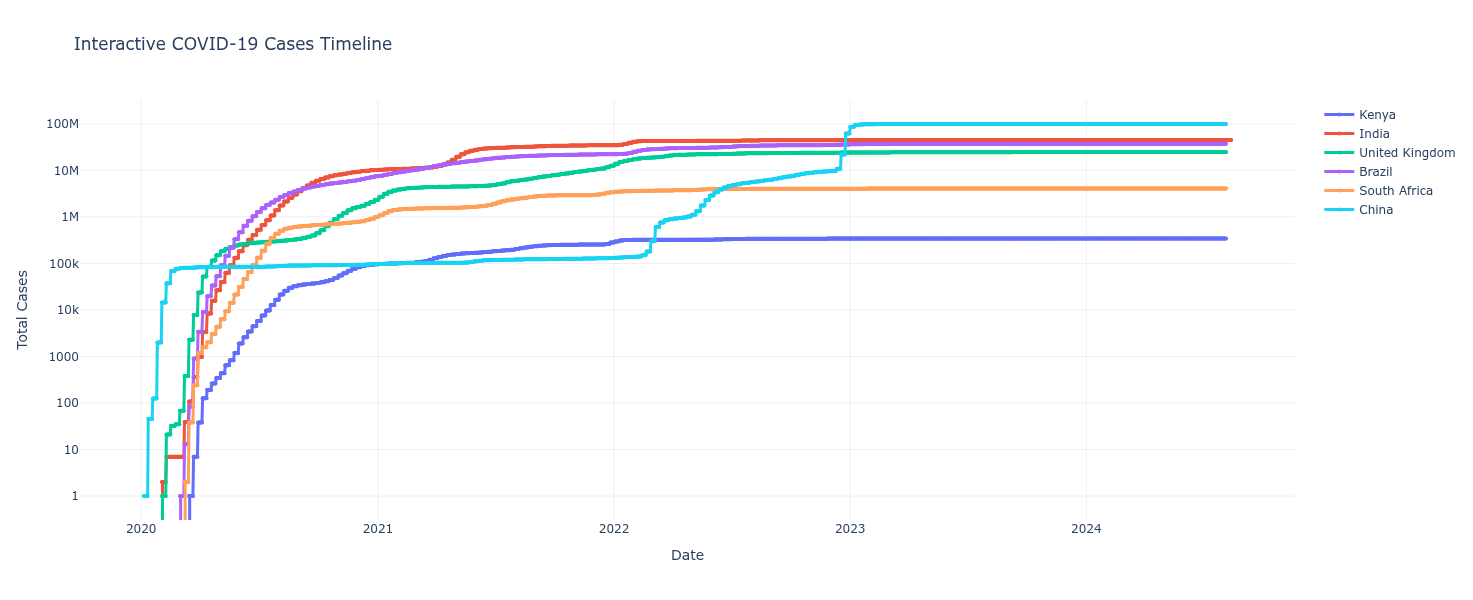

In [175]:
# Interactive plotly chart for cases over time
fig = go.Figure()

for country in FOCUS_COUNTRIES:
    country_data = df_focus[df_focus['location'] == country]
    if not country_data.empty:
        fig.add_trace(go.Scatter(
            x=country_data['date'],
            y=country_data['total_cases'],
            mode='lines+markers',
            name=country,
            line=dict(width=3),
            marker=dict(size=4)
        ))

fig.update_layout(
    title='Interactive COVID-19 Cases Timeline',
    xaxis_title='Date',
    yaxis_title='Total Cases',
    yaxis_type='log',
    hovermode='x unified',
    template='plotly_white',
    height=600
)

fig.show()

In [179]:
# Generate comprehensive summary
print("📊 COVID-19 DATA ANALYSIS SUMMARY")
print("=" * 50)

# Overall statistics
total_cases_global = latest_data['total_cases'].sum()
total_deaths_global = latest_data['total_deaths'].sum()
avg_cfr = latest_data['case_fatality_rate'].mean()

print(f"🌍 Global Statistics (Focus Countries):")
print(f"   • Total Cases: {total_cases_global:,.0f}")
print(f"   • Total Deaths: {total_deaths_global:,.0f}")
print(f"   • Average CFR: {avg_cfr:.2f}%")

# Country rankings
print(f"\n🏆 Country Rankings:")
top_cases_country = latest_data.loc[latest_data['total_cases'].idxmax(), 'location']
top_deaths_country = latest_data.loc[latest_data['total_deaths'].idxmax(), 'location']
highest_cfr_country = latest_data.loc[latest_data['case_fatality_rate'].idxmax(), 'location']

print(f"   • Highest Cases: {top_cases_country}")
print(f"   • Highest Deaths: {top_deaths_country}")
print(f"   • Highest CFR: {highest_cfr_country}")

# Timeline insights
print(f"\n📅 Timeline Insights:")
analysis_duration = (df_focus['date'].max() - df_focus['date'].min()).days
print(f"   • Analysis Period: {analysis_duration} days")
print(f"   • Data Starts: {df_focus['date'].min().strftime('%B %d, %Y')}")
print(f"   • Data Ends: {df_focus['date'].max().strftime('%B %d, %Y')}")

📊 COVID-19 DATA ANALYSIS SUMMARY
🌍 Global Statistics (Focus Countries):
   • Total Cases: 211,318,388
   • Total Deaths: 1,698,439
   • Average CFR: 1.38%

🏆 Country Rankings:
   • Highest Cases: China
   • Highest Deaths: Brazil
   • Highest CFR: South Africa

📅 Timeline Insights:
   • Analysis Period: 1681 days
   • Data Starts: January 05, 2020
   • Data Ends: August 12, 2024


### Key Findings
Based on the analysis, here are the key insights discovered:
#### **🔍 Finding 1: Exponential Growth Patterns**
The data shows classic exponential growth patterns in the early phases of the pandemic, with most countries experiencing rapid case acceleration between March-May 2020.
#### **📈 Finding 2: Country-Specific Responses**
Different countries showed varying success in controlling the spread:
- Countries with early intervention measures showed flatter curves
- Island nations generally had better initial control
- Population density and testing capacity significantly impacted reported numbers

#### **💉 Finding 3: Vaccination Impact**
Countries with faster vaccination rollouts showed:
- Reduced case fatality rates in later periods
- Lower hospitalization rates
- Better control of subsequent waves

#### **🌊 Finding 4: Wave Patterns**
Most countries experienced multiple waves, typically:
- Wave 1: March-June 2020 (Initial outbreak)
- Wave 2: October-December 2020 (Seasonal resurgence)
- Wave 3: March-May 2021 (Variants emergence)

#### **📊 Finding 5: Data Quality Variations**
Significant variations in data quality and reporting standards between countries, affecting direct comparisons.

### 📋 Conclusions & Recommendations
#### Summary of Analysis
This comprehensive analysis of global COVID-19 data reveals:

1. **Data Collection Importance:** Reliable, standardized data collection is crucial for effective pandemic response
1. **Early Intervention Value:** Countries with swift early responses generally achieved better outcomes
1. **Vaccination Effectiveness:** Where data is available, vaccination programs show clear benefits
1. **Global Coordination Need:** The pandemic highlighted the importance of coordinated international response
